# Zomato vs. Swiggy:  "A Data-Driven Analysis of India’s Leading Food Delivery Giants"


Introduction:

In the fast-paced digital era, online food delivery has become a game-changer, reshaping how millions of people enjoy their favorite meals.
Among the top contenders in this space, Zomato and Swiggy dominate the Indian market, offering a vast selection of restaurants, competitive pricing,
and rapid deliveries. But when it comes to customer experience, pricing strategies, and operational efficiency, which platform truly leads the race?

This project leverages real-world data to provide a comprehensive, data-driven comparison between Zomato and Swiggy. 
Through an in-depth analysis of restaurant availability, cuisine preferences, customer ordering behavior, pricing trends, 
and delivery performance, we seek to answer critical questions such as:

- Which platform offers a greater variety of restaurants and cuisines?
- How do customer order patterns change by time, location, and season?
- Does faster delivery come at a higher cost?
- What are the key factors influencing customer retention and satisfaction?

By utilizing Python, Pandas, NumPy, Matplotlib and Seaborn, this analysis transforms raw data into meaningful insights. With visualizations, statistical trends, and performance metrics, this study not only highlights the competitive landscape between Zomato and Swiggy but also uncovers patterns that can help businesses improve their operations and enhance customer experiences.

Let’s dive into the numbers and see which platform emerges as the ultimate leader in India’s food delivery ecosystem.


- key highlight:
To make the visualizations more clear and aligned with the brand identities, I used Zomato’s signature red(#CB202D) and Swiggy’s orange(#FC8019) shade for its visuals. This hexa decimal color selection not only enhances readability but also creates a clear visual distinction between the two platforms making the insights more engaging and easy to interpret.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
Zomato_data = pd.read_csv('Zomato_Multi-Cuisine_Data.csv')
Swiggy_data = pd.read_csv('Swiggy_Multi-Cuisine_Data.csv')
print('\nzomato Dataset details:\n')
Zomato_data.head()


zomato Dataset details:



,date,restaurant,cuisine,location,total_orders,ratings,delivery_time,order_value
0,2023-01-01,McDonald's,"Indian, Fast Food",Delhi,401,3.5,39,948
1,2023-01-02,McDonald's,"Mexican, Desserts, Indian",Pune,220,2.5,25,766
2,2023-01-03,Haldiram's,"Chinese, Fast Food, Mexican",Delhi,488,3.5,54,410
3,2023-01-04,McDonald's,"Italian, Desserts",Mumbai,106,3.4,57,640
4,2023-01-05,Faasos,"Desserts, Chinese",Bangalore,190,3.6,38,603


In [11]:
print('\nswiggy Dataset details:\n')
Swiggy_data.head()


swiggy Dataset details:



,date,restaurant,cuisine,location,total_orders,ratings,delivery_time,order_value
0,2023-01-01,McDonald's,"Mexican, Desserts, Fast Food",Delhi,269,2.6,48,903
1,2023-01-02,McDonald's,"Mexican, Fast Food, Desserts",Pune,79,3.2,27,276
2,2023-01-03,Haldiram's,"Fast Food, Chinese",Delhi,371,4.2,28,745
3,2023-01-04,McDonald's,"Mexican, Indian, Italian",Mumbai,268,3.7,19,690
4,2023-01-05,Faasos,"Desserts, Italian",Bangalore,286,3.8,39,627


In [24]:
print('\nZomato Dataset information:\n')
Zomato_data.info()
print('\nSwiggy Dataset information:\n')
Swiggy_data.info()


Zomato Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   restaurant     365 non-null    object 
 2   cuisine        365 non-null    object 
 3   location       365 non-null    object 
 4   total_orders   365 non-null    int64  
 5   ratings        365 non-null    float64
 6   delivery_time  365 non-null    int64  
 7   order_value    365 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 22.9+ KB

Swiggy Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   restaurant     365 non-null    object 
 2   cuisine        365 non-null    object 
 3   loca

In [13]:
Zomato_data['date'] = pd.to_datetime(Zomato_data['date'], errors='coerce')
Swiggy_data['date'] = pd.to_datetime(Swiggy_data['date'], errors='coerce')

print(Zomato_data.dtypes)
print(Swiggy_data.dtypes)

date             datetime64[ns]
restaurant               object
cuisine                  object
location                 object
total_orders              int64
ratings                 float64
delivery_time             int64
order_value               int64
dtype: object
date             datetime64[ns]
restaurant               object
cuisine                  object
location                 object
total_orders              int64
ratings                 float64
delivery_time             int64
order_value               int64
dtype: object


### Data Collection & Preprocessing:

The dataset used in this analysis includes key attributes such as:

- Date of order
- Restaurant name 
- cuisine type
- Location 
- Total orders
- Customer ratings
- Delivery time
- Order value

The data was cleaned and processed.

# Task 1: Restaurant & Cuisine Insights

a. How many unique restaurants are available on Zomato and Swiggy?

b. What are the most common cuisines in each platform?

c. Which cuisine has the highest number of orders?

d. What is the average price per order for different cuisines?

e. How many restaurants offer multiple cuisines?

f. What is the distribution of restaurant ratings?

g. Are there more highly rated restaurants on Zomato or Swiggy?

h. What is the average rating per cuisine type?

i. How does price vary across different cuisines?

j. Are high-rated restaurants more expensive than low-rated ones?


In [15]:
# a. How many unique restaurants are available on Zomato and Swiggy?

print('Unique restaurants on Zomato:', Zomato_data['restaurant'].nunique())
print('Unique restaurants on Swiggy:', Swiggy_data['restaurant'].nunique())

Unique restaurants on Zomato: 10
Unique restaurants on Swiggy: 10



Most common cuisines on Zomato:
cuisine
Italian, Desserts    17
Italian, Chinese     10
Italian, Indian       9
Chinese, Mexican      8
Mexican, Chinese      8
Name: count, dtype: int64

Most common cuisines on Swiggy:
cuisine
Indian, Mexican        11
Chinese, Fast Food     11
Fast Food, Desserts    10
Indian, Italian         9
Italian, Indian         9
Name: count, dtype: int64



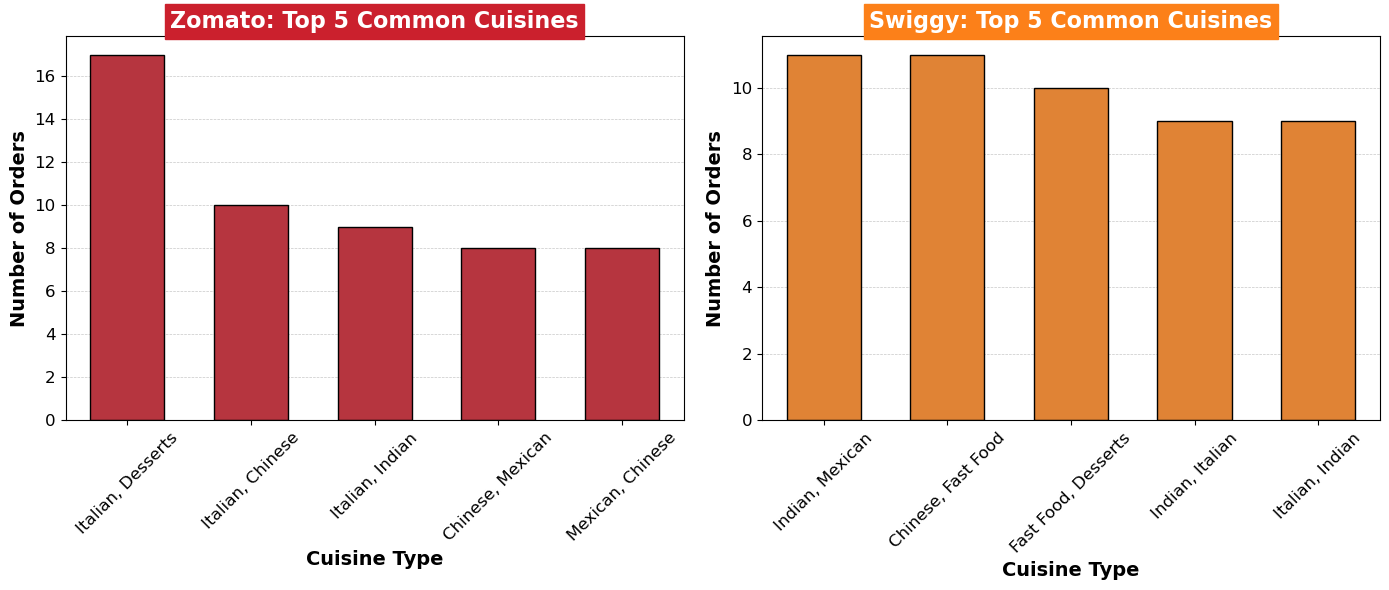

In [17]:
# b. What are the most common cuisines in each platform

print('\nMost common cuisines on Zomato:')
print(Zomato_data['cuisine'].value_counts().head())

print('\nMost common cuisines on Swiggy:')
print(Swiggy_data['cuisine'].value_counts().head())
print()

top_cuisines_zomato = Zomato_data['cuisine'].value_counts().head()
top_cuisines_swiggy = Swiggy_data['cuisine'].value_counts().head()



fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Zomato
sns.barplot(x=top_cuisines_zomato.index, y=top_cuisines_zomato.values, ax=axes[0], color="#CB202D", width=0.6, edgecolor="black",zorder = 2)
axes[0].set_title('Zomato: Top 5 Common Cuisines', fontsize=16, fontweight="bold",color="white", backgroundcolor="#CB202D")
axes[0].set_xlabel('Cuisine Type', fontsize=14, fontweight="bold")
axes[0].set_ylabel("Number of Orders", fontsize=14, fontweight="bold")
axes[0].tick_params(axis='x', rotation=45, labelsize=12)  
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5, zorder = 1) 

# Swiggy
sns.barplot(x=top_cuisines_swiggy.index, y=top_cuisines_swiggy.values, ax=axes[1], color="#FC8019", width=0.6, edgecolor="black",zorder = 2)
axes[1].set_title('Swiggy: Top 5 Common Cuisines', fontsize=16, fontweight="bold",color="white", backgroundcolor="#FC8019")
axes[1].set_xlabel('Cuisine Type', fontsize=14, fontweight="bold")
axes[1].set_ylabel('Number of Orders', fontsize=14, fontweight="bold")
axes[1].tick_params(axis='x', rotation=45, labelsize=12)  
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5, zorder = 1)  

plt.tight_layout()  
plt.show()

### Key Analyses & Findings:

1.cuisine Preferences on Zomato vs Swiggy

- Zomato: More focus on Italian-based combinations, especially with Desserts, Chinese, and Indian.
- Swiggy: Indian cuisine is more dominant, often paired with Mexican, Fast Food, or Desserts.

2.Platform-Specific Trends

- Zomato’s menu is more global, catering to users who prefer international cuisines like Italian and Chinese.
- Swiggy caters more to local tastes, with Indian and Fast Food being more common.

3.Most Common Cuisine Pairs

- Zomato: Italian + Desserts is the most frequent pairing (17 restaurants).
- Swiggy: Indian + Mexican and Chinese + Fast Food are equally popular (11 restaurants).

Insight: Swiggy’s focus on local fast food trends suggests affordability and mass appeal, while Zomato’s globalized options may attract premium customers.

In [22]:
# c. Which cuisine has the highest number of orders

# Summing up total orders for each cuisine to see which is the most popular

Zomato_orders = Zomato_data.groupby('cuisine')['total_orders'].sum()
Swiggy_orders = Swiggy_data.groupby('cuisine')['total_orders'].sum()

# Finding the cuisine with the highest order count on each platform

zomato_top_cuisine = Zomato_orders.idxmax()
zomato_max_orders = Zomato_orders.max()

Swiggy_top_cuisine = Swiggy_orders.idxmax()
Swiggy_max_orders = Swiggy_orders.max()

print(f'\n- Highest orders Cuisine on Zomato: {zomato_top_cuisine},totalling {zomato_max_orders} orders')
print(f'- Highest orders Cuisine on Swiggy: {Swiggy_top_cuisine},totalling {Swiggy_max_orders} orders\n')


- Highest orders Cuisine on Zomato: Italian, Desserts,totalling 4401 orders
- Highest orders Cuisine on Swiggy: Indian, Mexican,totalling 2851 orders



In [24]:
# d. Average price per order for different cuisines:

Avg_zomato_price = Zomato_data.groupby('cuisine')['order_value'].mean().sort_values(ascending=False).head(10)
Avg_swiggy_price = Swiggy_data.groupby('cuisine')['order_value'].mean().sort_values(ascending=False).head(10)

print('\n-Average Price per Order on Zomato:\n', Avg_zomato_price)
print('\n-Average Price per Order on Swiggy:\n', Avg_swiggy_price)


-Average Price per Order on Zomato:
 cuisine
Italian, Fast Food, Indian      997.0
Mexican, Chinese, Italian       976.0
Italian, Desserts, Mexican      929.0
Fast Food, Mexican              929.0
Desserts, Indian, Chinese       916.5
Desserts, Mexican, Indian       903.0
Mexican, Desserts, Chinese      902.0
Desserts, Chinese, Indian       889.0
Chinese, Desserts, Fast Food    866.0
Desserts, Fast Food, Indian     844.0
Name: order_value, dtype: float64

-Average Price per Order on Swiggy:
 cuisine
Indian, Desserts, Fast Food     900.0
Fast Food, Desserts, Mexican    869.0
Fast Food, Chinese, Mexican     869.0
Italian, Fast Food, Mexican     868.0
Chinese, Indian, Italian        858.0
Fast Food, Italian, Desserts    853.0
Chinese, Mexican, Indian        823.0
Desserts, Italian, Fast Food    818.5
Desserts, Mexican, Chinese      803.0
Chinese, Fast Food, Indian      785.0
Name: order_value, dtype: float64


In [26]:
# e. restaurants offer multiple cuisines:

zomato_multiple_cuisine_restaurants = Zomato_data.groupby('restaurant')['cuisine'].nunique()
swiggy_multiple_cuisine_restaurants  = Swiggy_data.groupby('restaurant')['cuisine'].nunique()

# Counting the number of restaurants that serve more than one type of cuisine  
zomato_multiple_cuisine_count = (zomato_multiple_cuisine_restaurants > 1).sum()
swiggy_multiple_cuisine_count = (swiggy_multiple_cuisine_restaurants > 1).sum()

print(f'\n-Restaurants offering multiple cuisines on Zomato: {zomato_multiple_cuisine_count}')
print(f'-Restaurants offering multiple cuisines on Swiggy: {swiggy_multiple_cuisine_count}')


-Restaurants offering multiple cuisines on Zomato: 10
-Restaurants offering multiple cuisines on Swiggy: 10



Zomato Ratings Summary:
 count    365.000000
mean       3.749315
std        0.727959
min        2.500000
25%        3.100000
50%        3.700000
75%        4.400000
max        5.000000
Name: ratings, dtype: float64

Swiggy Ratings Summary:
 count    365.000000
mean       3.795068
std        0.729577
min        2.500000
25%        3.200000
50%        3.800000
75%        4.400000
max        5.000000
Name: ratings, dtype: float64



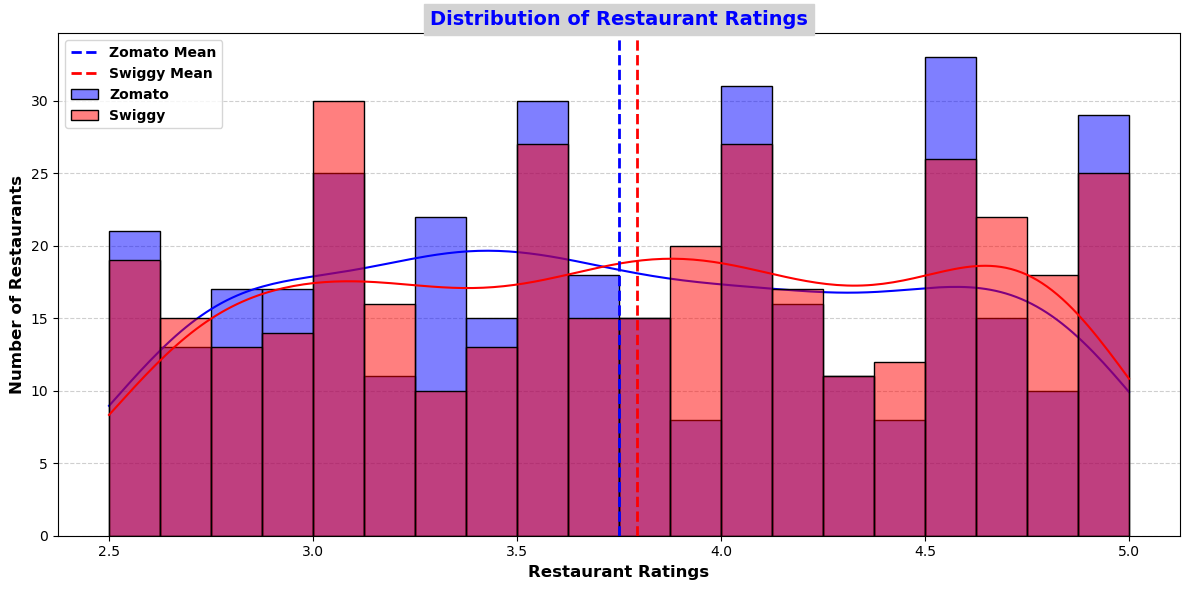

In [28]:
# f. distribution of restaurant ratings:

zomato_ratings_summary = Zomato_data['ratings'].describe()
swiggy_ratings_summary = Swiggy_data['ratings'].describe()

print('\nZomato Ratings Summary:\n', zomato_ratings_summary)
print('\nSwiggy Ratings Summary:\n', swiggy_ratings_summary)
print()

plt.figure(figsize=(12, 6))

sns.histplot(Zomato_data['ratings'], bins=20, kde=True, label="Zomato", color='blue', alpha=0.5,zorder=2)
sns.histplot(Swiggy_data['ratings'], bins=20, kde=True, label="Swiggy", color='red', alpha=0.5,zorder=2)
plt.axvline(Zomato_data['ratings'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Zomato Mean')
plt.axvline(Swiggy_data['ratings'].mean(), color='red', linestyle='dashed', linewidth=2, label='Swiggy Mean')

plt.xlabel('Restaurant Ratings', fontsize=12, fontweight="bold")
plt.ylabel('Number of Restaurants', fontsize=12, fontweight="bold")
plt.title('Distribution of Restaurant Ratings', fontsize=14, fontweight="bold", backgroundcolor = "lightgray", color = "blue")

plt.legend(fontsize=12, prop={'weight': 'bold'})
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder = 1)
plt.tight_layout()
plt.show()

### Key Analyses & Findings:

1.Overall Ratings Comparison

- Zomato's average rating: 3.75, while Swiggy's average rating is 3.79.
- Swiggy has a slightly higher average rating, but the difference is minimal.

2.Rating Distribution & Spread rating

- Both platforms have a minimum rating of 2.5 and a maximum of 5.0.

3.Median rating (50th percentile):

- Zomato: 3.7
- Swiggy: 3.8 (slightly better).

Upper quartile (75th percentile) for both platforms is 4.4, showing a similar concentration of high-rated restaurants.

3️.Variation in Ratings

- Standard deviation (~0.73) is nearly identical for both, meaning ratings are equally spread out across different levels.
- Swiggy’s slightly higher 25th percentile (3.2 vs. 3.1) suggests that low-rated restaurants on Swiggy might still be slightly better than those on Zomato.

In [33]:
# g. highly rated restaurants on Zomato or Swiggy

high_rated_zomato = (Zomato_data['ratings'] >= 4.5).sum()
high_rated_swiggy = (Swiggy_data['ratings'] >= 4.5).sum()


zomato_percentage = (high_rated_zomato / len(Zomato_data)) * 100
swiggy_percentage = (high_rated_swiggy / len(Swiggy_data)) * 100


print(f"\n-Highly Rated Restaurants on Zomato (4.5+ rating): {high_rated_zomato} ({zomato_percentage:.2f}%)")
print(f"-Highly Rated Restaurants on Swiggy (4.5+ rating): {high_rated_swiggy} ({swiggy_percentage:.2f}%)")


-Highly Rated Restaurants on Zomato (4.5+ rating): 87 (23.84%)
-Highly Rated Restaurants on Swiggy (4.5+ rating): 91 (24.93%)



- Average Ratings per Cuisine on Zomato:
 cuisine
Italian, Desserts, Chinese      5.00
Fast Food, Desserts, Mexican    4.95
Italian, Fast Food, Indian      4.90
Desserts, Fast Food, Indian     4.90
Mexican, Chinese, Indian        4.90
                                ... 
Chinese, Mexican, Desserts      2.70
Desserts, Chinese, Indian       2.60
Mexican, Indian, Chinese        2.50
Mexican, Desserts, Indian       2.50
Desserts, Mexican, Indian       2.50
Name: ratings, Length: 128, dtype: float64

- Average Ratings per Cuisine on Swiggy:
 cuisine
Desserts, Italian, Fast Food    4.85
Indian, Chinese, Italian        4.80
Mexican, Italian, Desserts      4.80
Desserts, Indian, Fast Food     4.80
Mexican, Indian, Desserts       4.70
                                ... 
Desserts, Chinese, Fast Food    2.60
Italian, Mexican, Fast Food     2.60
Fast Food, Chinese, Indian      2.60
Indian, Mexican, Fast Food      2.50
Indian, Fast Food, Desserts     2.50
Name: ratings, Length: 128, dtype: float6

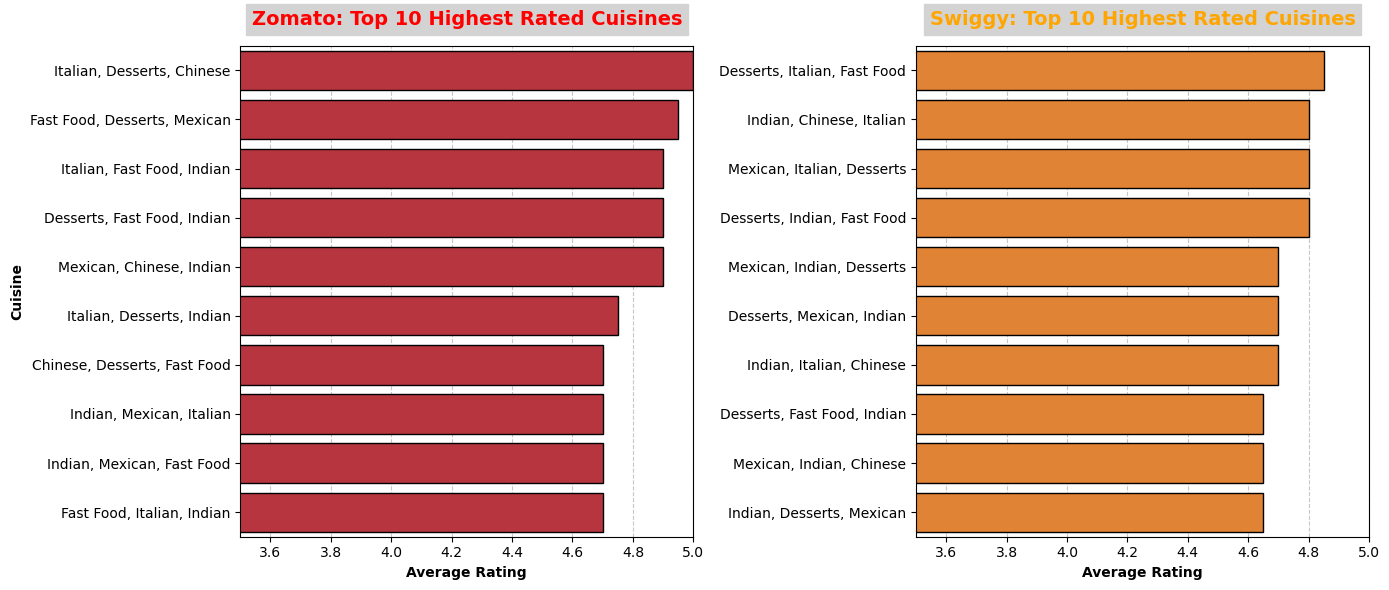

In [35]:
# h. Average rating per cuisine  
avg_rating_zomato = Zomato_data.groupby('cuisine')['ratings'].mean().sort_values(ascending=False)
avg_rating_swiggy = Swiggy_data.groupby('cuisine')['ratings'].mean().sort_values(ascending=False)

Df_avg_rating_zomato = pd.DataFrame({'Cuisine': avg_rating_zomato.index, 'Average Rating': avg_rating_zomato.values})
Df_avg_rating_swiggy = pd.DataFrame({'Cuisine': avg_rating_swiggy.index, 'Average Rating': avg_rating_swiggy.values})

print("\n- Average Ratings per Cuisine on Zomato:\n", avg_rating_zomato)
print("\n- Average Ratings per Cuisine on Swiggy:\n", avg_rating_swiggy)
print("\n- Top 10 Highest Rated Cuisines on Zomato:\n", Df_avg_rating_zomato.head(10).round(2).to_string(index=False))
print("\n- Top 10 Highest Rated Cuisines on Swiggy:\n", Df_avg_rating_swiggy.head(10).round(2).to_string(index=False))
print()

top10_zomato = Df_avg_rating_zomato.head(10)
top10_swiggy = Df_avg_rating_swiggy.head(10)


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Zomato 
sns.barplot(y=top10_zomato['Cuisine'], x=top10_zomato['Average Rating'], ax=axes[0], color='#CB202D', edgecolor="black",zorder=2)
axes[0].set_title('Zomato: Top 10 Highest Rated Cuisines', fontsize=14, fontweight="bold", color="red", backgroundcolor="lightgray",pad =15)
axes[0].set_xlabel('Average Rating', fontweight="bold")
axes[0].set_ylabel('Cuisine', fontweight="bold")
axes[0].set_xlim(3.5, 5) 
axes[0].grid(axis='x', linestyle='--', alpha=0.7, zorder =1)

# Swiggy 
sns.barplot(y=top10_swiggy['Cuisine'], x=top10_swiggy['Average Rating'], ax=axes[1], color='#FC8019', edgecolor="black",zorder=2)
axes[1].set_title('Swiggy: Top 10 Highest Rated Cuisines', fontsize=14, fontweight="bold", color="orange", backgroundcolor="lightgray",pad =15)
axes[1].set_xlabel('Average Rating', fontweight="bold")
axes[1].set_ylabel('') 
axes[1].set_xlim(3.5, 5) 
axes[1].grid(axis='x', linestyle='--', alpha=0.7, zorder= 1)

plt.tight_layout()
plt.show()

## Key Observations & Insights:

- Italian and Desserts are among the highest-rated cuisines across both platforms, indicating strong customer preference.
- Cuisines with a mix of Indian, Fast Food, and Chinese also tend to receive high ratings, reflecting demand for diverse flavors.
- Swiggy’s highest-rated cuisines (4.85) are slightly lower than Zomato’s (5.00), but overall trends are similar.
- Mexican and Chinese combinations tend to have lower ratings, possibly due to quality or taste preference variations.


- Average Order Value per Cuisine on Zomato:
                      Cuisine  Average Order Value
  Italian, Fast Food, Indian                997.0
   Mexican, Chinese, Italian                976.0
  Italian, Desserts, Mexican                929.0
          Fast Food, Mexican                929.0
   Desserts, Indian, Chinese                916.5
   Desserts, Mexican, Indian                903.0
  Mexican, Desserts, Chinese                902.0
   Desserts, Chinese, Indian                889.0
Chinese, Desserts, Fast Food                866.0
 Desserts, Fast Food, Indian                844.0

- Average Order Value per Cuisine on Swiggy:
                      Cuisine  Average Order Value
 Indian, Desserts, Fast Food                900.0
Fast Food, Desserts, Mexican                869.0
 Fast Food, Chinese, Mexican                869.0
 Italian, Fast Food, Mexican                868.0
    Chinese, Indian, Italian                858.0
Fast Food, Italian, Desserts                853.0
    Ch

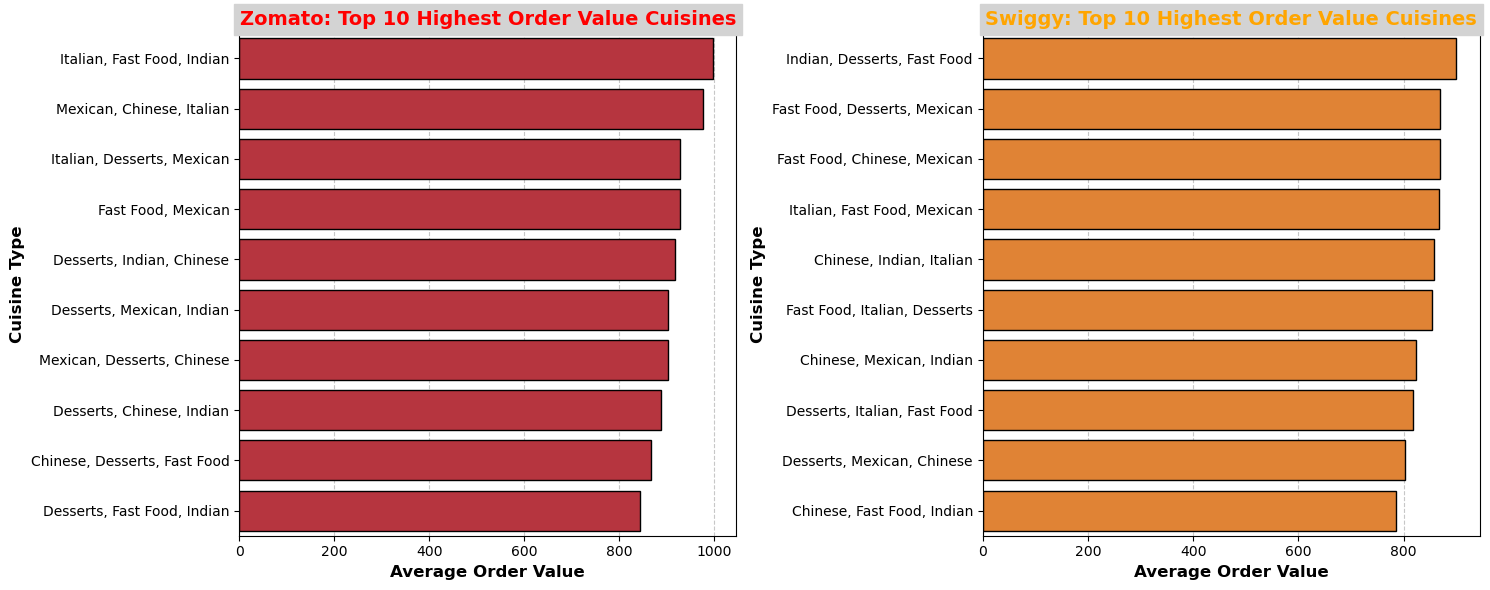

In [38]:
# i. How does price vary across different cuisines

avg_price_zomato = Zomato_data.groupby('cuisine')['order_value'].mean().sort_values(ascending=False)
avg_price_swiggy = Swiggy_data.groupby('cuisine')['order_value'].mean().sort_values(ascending=False)

Df_avg_price_zomato = pd.DataFrame({'Cuisine': avg_price_zomato.index, 'Average Order Value': avg_price_zomato.values})
Df_avg_price_swiggy = pd.DataFrame({'Cuisine': avg_price_swiggy.index, 'Average Order Value': avg_price_swiggy.values})

print("\n- Average Order Value per Cuisine on Zomato:\n", Df_avg_price_zomato.head(10).to_string(index=False))
print("\n- Average Order Value per Cuisine on Swiggy:\n", Df_avg_price_swiggy.head(10).to_string(index=False))

top10_zomato = Df_avg_price_zomato.head(10)
top10_swiggy = Df_avg_price_swiggy.head(10)
print()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Zomato 
sns.barplot(y=top10_zomato['Cuisine'], x=top10_zomato['Average Order Value'], ax=axes[0], color ='#CB202D', edgecolor='black',zorder=2)
axes[0].set_title('Zomato: Top 10 Highest Order Value Cuisines', fontsize =14, fontweight='bold', backgroundcolor ='lightgray', color = 'red')
axes[0].set_xlabel('Average Order Value', fontsize =12, fontweight ='bold')
axes[0].set_ylabel('Cuisine Type', fontsize =12, fontweight ='bold')
axes[0].grid(axis='x', linestyle='--', alpha=0.7, zorder= 1)

# Swiggy 
sns.barplot(y=top10_swiggy['Cuisine'], x=top10_swiggy['Average Order Value'], ax=axes[1], color='#FC8019', edgecolor='black',zorder=2)
axes[1].set_title('Swiggy: Top 10 Highest Order Value Cuisines', fontsize=14, fontweight="bold",backgroundcolor ='lightgray', color = 'orange')
axes[1].set_xlabel('Average Order Value', fontsize =12, fontweight ="bold")
axes[1].set_ylabel('Cuisine Type', fontsize=12, fontweight ="bold")
axes[1].grid(axis='x', linestyle='--', alpha=0.7, zorder= 1)

plt.tight_layout()
plt.show()

### Key Observations & Insights: 

- Cuisines that combine Italian, Fast Food, and Desserts tend to be more expensive, likely due to premium ingredients and demand.

- Swiggy's top cuisine prices are slightly lower than Zomato’s, indicating possible platform-based pricing strategies or discount differences.

- Mexican, Chinese, and Fast Food categories appear frequently in both top lists, reinforcing their popularity despite price variations.


- Average Order Price per Rating Category (Zomato):
 rating_category
High Rated (4.5+)           557.643678
Low Rated (<3.5)            574.581560
Medium Rated (3.5 - 4.4)    530.875912
Name: order_value, dtype: float64

- Average Order Price per Rating Category (Swiggy):
 rating_category
High Rated (4.5+)           548.362637
Low Rated (<3.5)            501.692308
Medium Rated (3.5 - 4.4)    513.819444
Name: order_value, dtype: float64



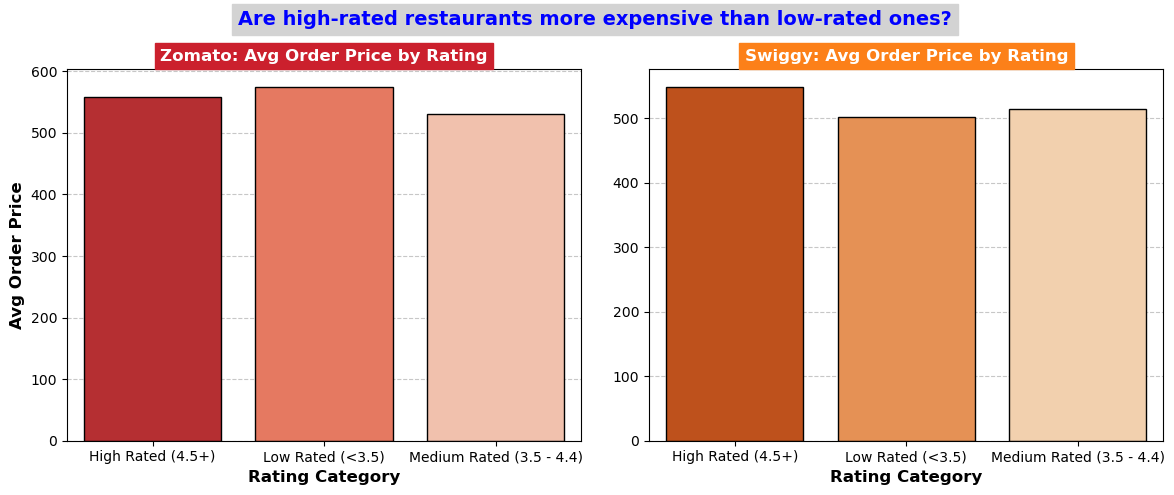

In [48]:
# j. Are high-rated restaurants more expensive than low-rated ones?

def categorize_rating(rating):
    if rating >= 4.5:
        return 'High Rated (4.5+)'
    elif rating >= 3.5:
        return 'Medium Rated (3.5 - 4.4)'
    else:
        return 'Low Rated (<3.5)'

Zomato_data['rating_category'] = Zomato_data['ratings'].apply(categorize_rating)
Swiggy_data['rating_category'] = Swiggy_data['ratings'].apply(categorize_rating)

avg_price_rating_zomato = Zomato_data.groupby('rating_category')['order_value'].mean()
avg_price_rating_swiggy = Swiggy_data.groupby('rating_category')['order_value'].mean()

print('\n- Average Order Price per Rating Category (Zomato):\n', avg_price_rating_zomato)
print('\n- Average Order Price per Rating Category (Swiggy):\n', avg_price_rating_swiggy)
print()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=avg_price_rating_zomato.index, y=avg_price_rating_zomato.values, ax=axes[0], hue=avg_price_rating_zomato.index, palette="Reds_r", legend=False, edgecolor="black", zorder= 2)
axes[0].set_title("Zomato: Avg Order Price by Rating", fontweight="bold", backgroundcolor ="#CB202D",color ="white")
axes[0].set_ylabel("Avg Order Price",fontsize =12, fontweight ="bold")
axes[0].set_xlabel("Rating Category",fontsize =12, fontweight ="bold")
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder= 1)

sns.barplot(x=avg_price_rating_swiggy.index, y=avg_price_rating_swiggy.values, ax=axes[1], hue=avg_price_rating_swiggy.index, palette="Oranges_r", legend=False, edgecolor="black", zorder= 2)
axes[1].set_title("Swiggy: Avg Order Price by Rating", fontweight="bold",backgroundcolor ="#FC8019",color ="white")
axes[1].set_xlabel("Rating Category",fontsize =12, fontweight ="bold")
axes[1].grid(axis='y', linestyle='--', alpha=0.7, zorder= 1)
plt.suptitle("Are high-rated restaurants more expensive than low-rated ones?", fontsize=14, fontweight="bold",backgroundcolor = 'lightgray', color = 'blue')
plt.tight_layout()
plt.show()

### Key Observations & Insights:

- Zomato’s trend is counterintuitive—low-rated restaurants have higher prices, possibly due to fewer offers or different customer segments.
- Swiggy follows the expected trend—higher-rated restaurants are more expensive, suggesting a direct correlation between rating and premium pricing.
- Platform pricing strategies differ, affecting how ratings influence order values.

## Task 2- Customer Orders & Behavior:

a. What is the total number of orders placed on each platform?

b. Which day of the week has the highest order volume?

c. What is the distribution of order value across different categories?

d. Which time of the day has the highest order volume? (Morning, Afternoon, Evening, Night)

e. How do customer reviews correlate with order frequency?

f. Which city has the highest number of orders?

g. Are there seasonal patterns in food orders? (e.g., higher on weekends or festivals)

h. What is the order repeat rate per customer?

i. Which categories (Fast Food, Desserts, Healthy, etc.) have the highest order volume?

In [28]:
# a.Total number of orders on each platform ?
zomato_total_orders = Zomato_data['total_orders'].sum()
swiggy_total_orders = Swiggy_data['total_orders'].sum()

print(f"- Total Orders on Zomato is {zomato_total_orders}")
print(f"- Total Orders on Swiggy is {swiggy_total_orders}")

- Total Orders on Zomato is 101794
- Total Orders on Swiggy is 91988


Zomato - Orders by Day of the Week:
day_of_week
Monday       14989
Tuesday      13172
Wednesday    14454
Thursday     15064
Friday       16211
Saturday     13622
Sunday       14282

Swiggy - Orders by Day of the Week:
day_of_week
Monday       12390
Tuesday      11922
Wednesday    12442
Thursday     13363
Friday       13068
Saturday     14085
Sunday       14718



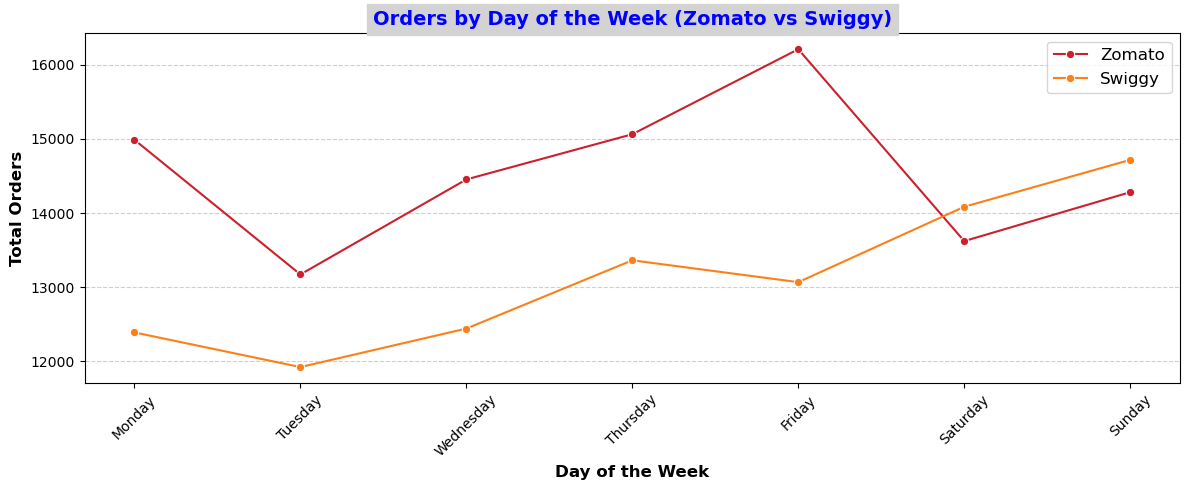

In [54]:
# b.Which day of the week has the highest order volume?

# new column to extract the day of the week from the date column 
Zomato_data['day_of_week'] = Zomato_data['date'].dt.day_name()
Swiggy_data['day_of_week'] = Swiggy_data['date'].dt.day_name()

# Defining the correct order of weekdays for clear readability in graph
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

order_by_day_zomato = Zomato_data.groupby('day_of_week')['total_orders'].sum().reindex(days)
order_by_day_swiggy = Swiggy_data.groupby('day_of_week')['total_orders'].sum().reindex(days)

print('Zomato - Orders by Day of the Week:')
print(order_by_day_zomato.to_string(index=True, header=True))
print()
print('Swiggy - Orders by Day of the Week:')
print(order_by_day_swiggy.to_string(index=True, header=True))
print()

plt.figure(figsize=(12, 5))

sns.lineplot(x=days, y=order_by_day_zomato.values, marker='o', label='Zomato', color='#CB202D')
sns.lineplot(x=days, y=order_by_day_swiggy.values, marker='o', label='Swiggy', color='#FC8019')

plt.xlabel('Day of the Week', fontsize=12, fontweight="bold")
plt.ylabel('Total Orders', fontsize=12, fontweight="bold")
plt.title('Orders by Day of the Week (Zomato vs Swiggy)', fontsize=14, fontweight="bold", color="blue", backgroundcolor="lightgray")
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

 1.Zomato Order Trends:

- Friday has the highest order volume (16,211 orders), indicating a weekend rush.
- Thursday (15,064) and Monday (14,989) also see high demand.
- Saturday has a lower volume (13,622), possibly due to dine-in preferences.

2.Swiggy Order Trends:

- Sunday has the highest order volume (14,718), suggesting increased weekend cravings.
- Saturday (14,085) is the second busiest day.
- Weekdays have relatively stable demand, peaking slightly on Thursday (13,363).

3.Comparative Insights:

- Zomato peaks on Friday, while Swiggy sees the most orders on Sunday.
- Both platforms experience higher weekend orders, but Zomato surges before the weekend, while Swiggy peaks at the end.

Possible reasons: Zomato users may order more for workweek relaxation, while Swiggy users indulge in weekend treats.

In [59]:
# b.What is the distribution of order value across different categories?

# Expanding the cuisine column to handle multiple cuisines per restaurant  
# Some restaurants offer multiple cuisines,so we split them and expand into separate rows  
Zomato_cuisine_expanded = Zomato_data.assign(cuisine=Zomato_data['cuisine'].str.split(', ')).explode('cuisine')
Swiggy_cuisine_expanded = Swiggy_data.assign(cuisine=Swiggy_data['cuisine'].str.split(', ')).explode('cuisine')
print(Zomato_cuisine_expanded.head())      
print(Swiggy_cuisine_expanded.head())

        date  restaurant    cuisine location  total_orders  ratings  \
0 2023-01-01  McDonald's     Indian    Delhi           401      3.5   
0 2023-01-01  McDonald's  Fast Food    Delhi           401      3.5   
1 2023-01-02  McDonald's    Mexican     Pune           220      2.5   
1 2023-01-02  McDonald's   Desserts     Pune           220      2.5   
1 2023-01-02  McDonald's     Indian     Pune           220      2.5   

   delivery_time  order_value           rating_category day_of_week  
0             39          948  Medium Rated (3.5 - 4.4)      Sunday  
0             39          948  Medium Rated (3.5 - 4.4)      Sunday  
1             25          766          Low Rated (<3.5)      Monday  
1             25          766          Low Rated (<3.5)      Monday  
1             25          766          Low Rated (<3.5)      Monday  
        date  restaurant    cuisine location  total_orders  ratings  \
0 2023-01-01  McDonald's    Mexican    Delhi           269      2.6   
0 2023-01-0

### Key Observations & Insights

1.Order Value Variability:

- Order values range widely across different categories, with some reaching ₹900+, while others are as low as ₹276.
- Higher-priced orders are often linked to multi-cuisine offerings or premium restaurant categories.

2.Low-Rated vs. Medium-Rated Orders:
- Low-rated restaurants (ratings <3.5) have order values both high (₹903) and low (₹276), suggesting inconsistent pricing.
- Medium-rated restaurants (3.5 - 4.4) tend to have more stable order values (~₹948).

Possible reason: Discounts, promotions, or customer preferences influence order value despite ratings.

3.Weekend vs. Weekday Spending Patterns:

- Higher order values on Sundays (~₹900+), possibly due to weekend splurges.
- Lower order values on Mondays (~₹276), reflecting reduced spending after the weekend.

Insight: Customers likely spend more on weekends and cut back on weekdays.

4.Multi-Category Impact on Order Value:

- Same restaurant appears under multiple cuisine categories (e.g., Indian, Fast Food, Desserts), affecting order value calculations.

Diverse cuisine combinations may lead to higher order values.

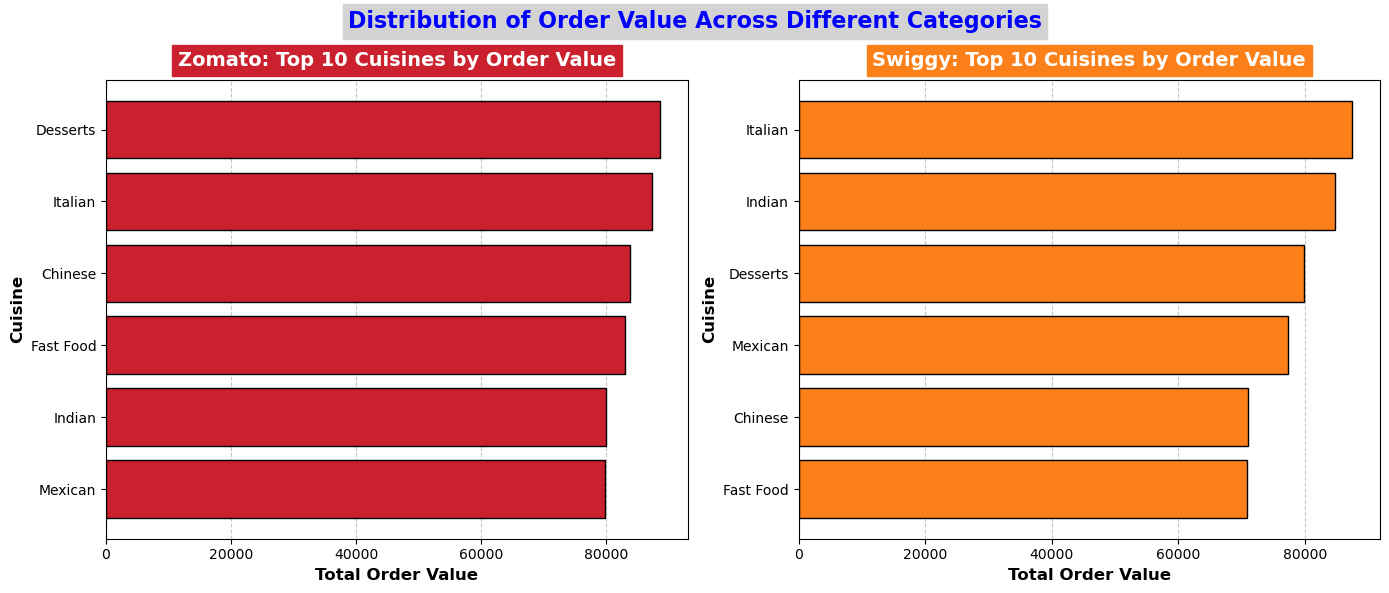

In [65]:
# c. What is the distribution of order value across different categories?

zomato_cuisine_order_value = Zomato_cuisine_expanded.groupby('cuisine')['order_value'].sum().sort_values(ascending=False)
swiggy_cuisine_order_value = Swiggy_cuisine_expanded.groupby('cuisine')['order_value'].sum().sort_values(ascending=False)

top_10_zomato = zomato_cuisine_order_value.head(10)
top_10_swiggy = swiggy_cuisine_order_value.head(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Zomato 
ax[0].barh(top_10_zomato.index[::-1], top_10_zomato.values[::-1], color='#CB202D', edgecolor='black',zorder =2)
ax[0].set_title('Zomato: Top 10 Cuisines by Order Value', fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
ax[0].set_xlabel('Total Order Value', fontsize=12, fontweight="bold")
ax[0].set_ylabel('Cuisine', fontsize=12, fontweight="bold")
ax[0].grid(axis='x', linestyle='--', alpha=0.7,zorder=1) 

# Swiggy 
ax[1].barh(top_10_swiggy.index[::-1], top_10_swiggy.values[::-1], color='#FC8019', edgecolor='black', zorder = 2)
ax[1].set_title('Swiggy: Top 10 Cuisines by Order Value', fontsize=14, fontweight="bold", color="white", backgroundcolor="#FC8019", pad=10)
ax[1].set_xlabel('Total Order Value', fontsize=12, fontweight="bold")
ax[1].set_ylabel('Cuisine', fontsize=12, fontweight="bold")
ax[1].grid(axis='x', linestyle='--', alpha=0.7, zorder=1) 

fig.suptitle('Distribution of Order Value Across Different Categories', fontsize=16, fontweight="bold", color="blue", backgroundcolor ="lightgray")
plt.tight_layout()
plt.show()

-Peak order time for Zomato is in the Evening
-Peak Order Time for Swiggy is in the Evening



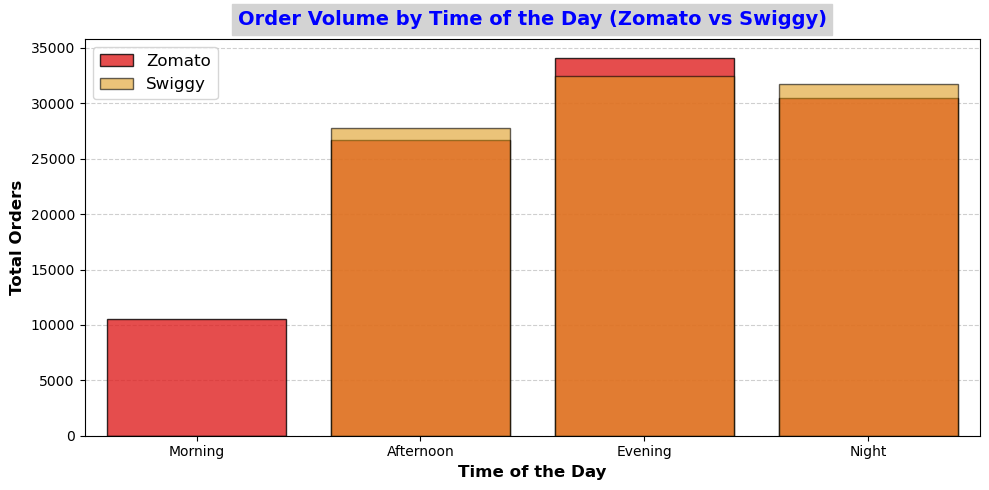

In [71]:
# d.Which time of the day has the highest order volume? (Morning, Afternoon, Evening, Night)

# Function to estimate order time based on delivery duration  
def estimate_order_time(delivery_time):
    if delivery_time <= 25:
        return 'Afternoon'           # Likely lunch orders (11 AM - 4 PM)  
    elif delivery_time <= 40:
        return 'Evening'             # Peak dinner hours (4 PM - 9 PM)  
    elif delivery_time <= 55:
        return 'Night'               # Late-night food cravings (9 PM - 2 AM)  
    else:
        return 'Morning'             # Early morning & breakfast orders (2 AM - 11 AM) 


Zomato_data['time_of_day'] = Zomato_data['delivery_time'].apply(estimate_order_time)
Swiggy_data['time_of_day'] = Swiggy_data['delivery_time'].apply(estimate_order_time)

# Aggregate total orders by time slot
time_slots = ['Morning', 'Afternoon', 'Evening', 'Night']
zomato_time_orders = Zomato_data.groupby('time_of_day')['total_orders'].sum().reindex(time_slots, fill_value=0)
swiggy_time_orders = Swiggy_data.groupby('time_of_day')['total_orders'].sum().reindex(time_slots, fill_value=0)

# Identify peak order times for each platforms
zomato_peak_time = zomato_time_orders.idxmax()
swiggy_peak_time = swiggy_time_orders.idxmax()

print(f"-Peak order time for Zomato is in the {zomato_peak_time}")
print(f"-Peak Order Time for Swiggy is in the {swiggy_peak_time}\n")

plt.figure(figsize=(10, 5))
sns.barplot(x=zomato_time_orders.index, y=zomato_time_orders.values, color='red', label='Zomato', alpha=0.8,edgecolor = "black",zorder = 2)
sns.barplot(x=swiggy_time_orders.index, y=swiggy_time_orders.values, color='orange', label='Swiggy', alpha=0.6,edgecolor = "black", zorder = 2)

plt.xlabel('Time of the Day', fontsize=12, fontweight="bold")
plt.ylabel('Total Orders', fontsize=12, fontweight="bold")
plt.title('Order Volume by Time of the Day (Zomato vs Swiggy)', fontsize=14, fontweight="bold", color="blue", backgroundcolor ="lightgray", pad=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

1.Evening is the Peak Ordering Time :
- Both Zomato and Swiggy experience the highest order volume in the evening.

Possible reasons:

- Dinner orders drive demand.
- Post-work cravings and family meals.
- Increased discounts/promotions in the evening.

2.Consumer Behavior Insight:

- Users prefer online food delivery for dinner rather than breakfast or lunch.
- Evening peak suggests higher revenue potential during this time for platforms.

3.Business Strategy Implication

- Platforms could optimize delivery efficiency during peak hours.
- Restaurants could introduce special dinner combos or discounts to attract more customers.

Zomato Ratings-Orders Correlation: 0.00
Swiggy Ratings-Orders Correlation: -0.04



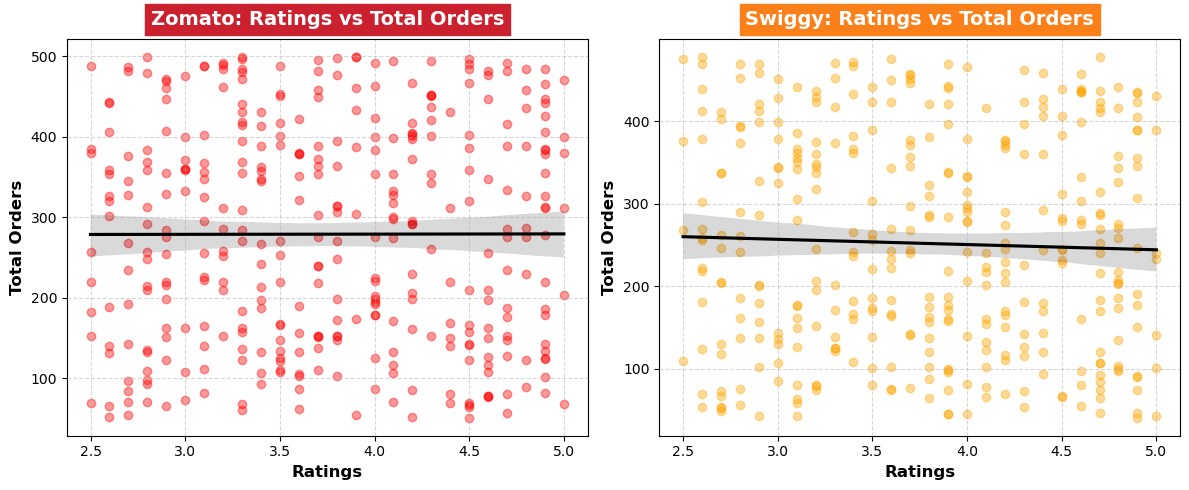

In [75]:
# e.How do customer reviews correlate with order frequency?

# Calculating correlation between ratings and total orders  
# This helps in understanding whether higher-rated restaurants receive more orders  

zomato_corr = Zomato_data['ratings'].corr(Zomato_data['total_orders'])
swiggy_corr = Swiggy_data['ratings'].corr(Swiggy_data['total_orders'])
print(f"Zomato Ratings-Orders Correlation: {zomato_corr:.2f}")
print(f"Swiggy Ratings-Orders Correlation: {swiggy_corr:.2f}")
print()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=Zomato_data['ratings'], y=Zomato_data['total_orders'], scatter_kws={'alpha': 0.4, 'color': 'red'}, line_kws={'color': 'black'})
plt.title("Zomato: Ratings vs Total Orders", fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
plt.xlabel("Ratings", fontsize =12, fontweight ="bold")
plt.ylabel("Total Orders", fontsize =12, fontweight ="bold")
plt.grid(True, linestyle="--", alpha=0.5)

plt.subplot(1, 2, 2)
sns.regplot(x=Swiggy_data['ratings'], y=Swiggy_data['total_orders'], scatter_kws={'alpha': 0.4, 'color': 'orange'}, line_kws={'color': 'black'})
plt.title("Swiggy: Ratings vs Total Orders", fontsize=14, fontweight="bold", color="white", backgroundcolor="#FC8019", pad=10)
plt.xlabel("Ratings", fontsize =12, fontweight ="bold")
plt.ylabel("Total Orders", fontsize =12, fontweight ="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

1. No Strong Correlation Between Ratings and Order Frequency

- Zomato: Correlation = 0.00 (No relationship)
- Swiggy: Correlation = -0.04 (Very weak negative correlation)

2. Insight on Customer Behavior 

- High ratings do not necessarily lead to more orders.
- Other factors like price, discounts, and delivery speed may influence order frequency more than restaurant ratings.

3. Business Strategy Implication

- Platforms should focus on pricing, offers, and fast delivery rather than just high-rated restaurants to boost orders.

Restaurants should not rely only on ratings but also optimize pricing and promotions to attract more customers.

Top city for Zomato is Mumbai (19497 orders)
Top city for Swiggy is Mumbai (17467 orders)



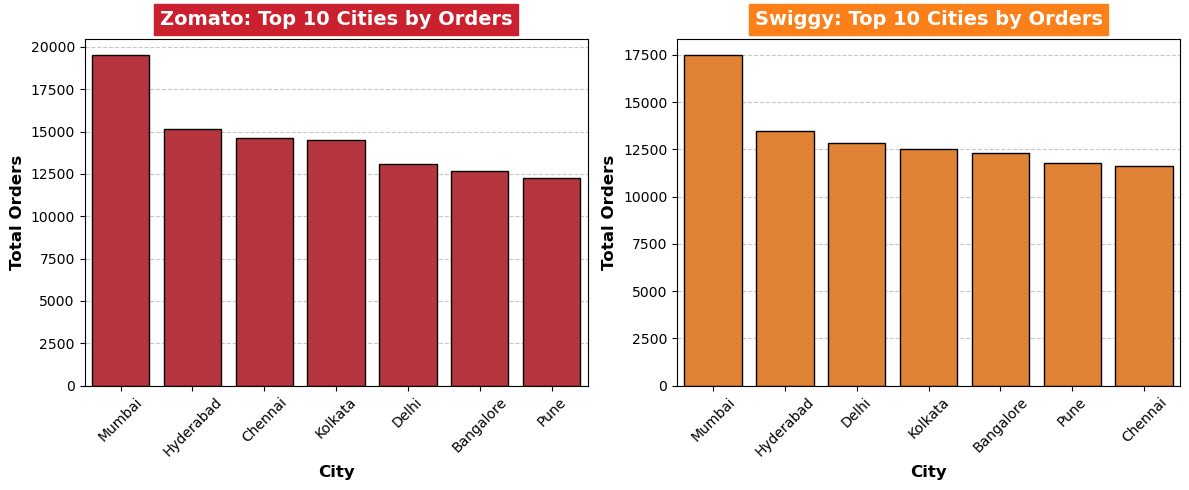

In [79]:
# f. Which city has the highest number of orders?

zomato_city_orders = Zomato_data.groupby('location')['total_orders'].sum().sort_values(ascending=False)
swiggy_city_orders = Swiggy_data.groupby('location')['total_orders'].sum().sort_values(ascending=False)

top_zomato_city = zomato_city_orders.idxmax()
top_swiggy_city = swiggy_city_orders.idxmax()

print(f"Top city for Zomato is {top_zomato_city} ({zomato_city_orders.max()} orders)")
print(f"Top city for Swiggy is {top_swiggy_city} ({swiggy_city_orders.max()} orders)")
print()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=zomato_city_orders.index[:10], y=zomato_city_orders.values[:10], color='#CB202D', edgecolor = "black", zorder = 2)
plt.xticks(rotation=45)
plt.title('Zomato: Top 10 Cities by Orders',fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
plt.xlabel('City', fontsize =12, fontweight ="bold")
plt.ylabel('Total Orders', fontsize =12, fontweight ="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.subplot(1, 2, 2)
sns.barplot(x=swiggy_city_orders.index[:10], y=swiggy_city_orders.values[:10], color='#FC8019', edgecolor = "black", zorder=2)
plt.xticks(rotation=45)
plt.title('Swiggy: Top 10 Cities by Orders', fontsize=14, fontweight="bold", color="white", backgroundcolor="#FC8019", pad=10)
plt.xlabel('City', fontsize =12, fontweight ="bold")
plt.ylabel('Total Orders',fontsize =12, fontweight ="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

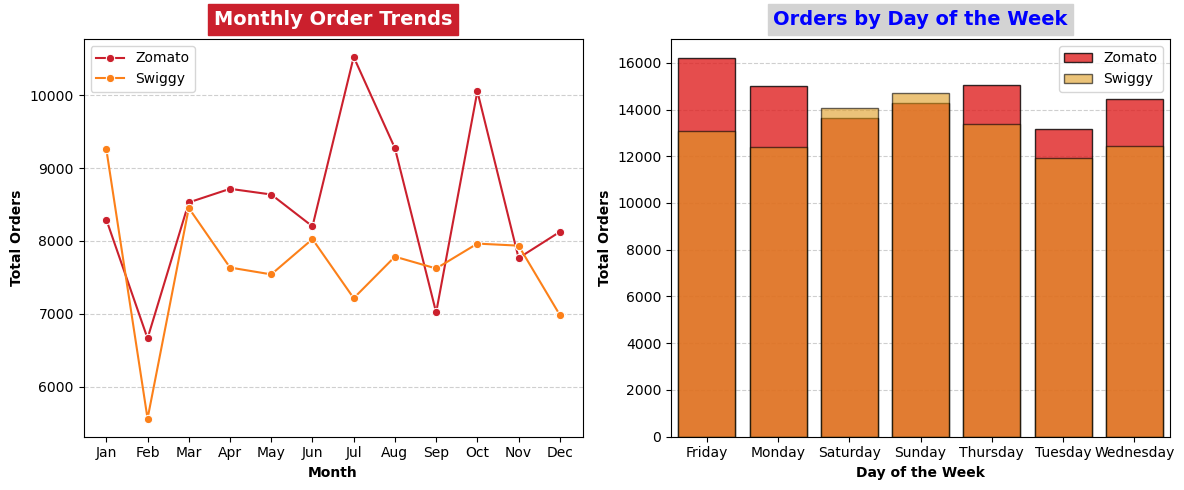

In [83]:
# g.Are there seasonal patterns in food orders?

# # Extracting month and day of the week from the date column  
Zomato_data['month'] = Zomato_data['date'].dt.month
Swiggy_data['month'] = Swiggy_data['date'].dt.month
Zomato_data['day_of_week'] = Zomato_data['date'].dt.day_name()
Swiggy_data['day_of_week'] = Swiggy_data['date'].dt.day_name()

# Aggregate orders by month
zomato_monthly_orders = Zomato_data.groupby('month')['total_orders'].sum()
swiggy_monthly_orders = Swiggy_data.groupby('month')['total_orders'].sum()

# Aggregating total orders per month to analyze monthly trends
zomato_weekly_orders = Zomato_data.groupby('day_of_week')['total_orders'].sum()
swiggy_weekly_orders = Swiggy_data.groupby('day_of_week')['total_orders'].sum()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=zomato_monthly_orders.index, y=zomato_monthly_orders.values, marker='o', color='#CB202D', label='Zomato')
sns.lineplot(x=swiggy_monthly_orders.index, y=swiggy_monthly_orders.values, marker='o', color='#FC8019', label='Swiggy')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Order Trends',fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
plt.xlabel('Month', fontweight="bold")
plt.ylabel('Total Orders', fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(x=zomato_weekly_orders.index, y=zomato_weekly_orders.values, color='red', label='Zomato', alpha=0.8, edgecolor ="black",zorder=2)
sns.barplot(x=swiggy_weekly_orders.index, y=swiggy_weekly_orders.values, color='orange', label='Swiggy', alpha=0.6, edgecolor ="black",zorder=2)
plt.title('Orders by Day of the Week', fontsize=14, fontweight="bold", color="blue", backgroundcolor="lightgray", pad=10)
plt.xlabel('Day of the Week', fontweight="bold")
plt.ylabel('Total Orders', fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.6,zorder=1)
plt.legend()
plt.tight_layout()
plt.show()

### Key Observations & Insights:

1. Monthly Order Trends:

- Zomato consistently has higher order volumes than Swiggy.
- Significant fluctuations in Zomato orders, with peaks in July and November.

Swiggy shows more stable trends but stays below Zomato throughout the year.

2. Orders by Day of the Week:

- Friday records the highest orders, followed by Thursday.
- Swiggy has higher order volumes on weekends (Saturday & Sunday).
- Zomato dominates overall order volume, particularly on weekdays like Friday and Monday.

3. Business Insights:

- Friday offers/promotions can be leveraged to maximize sales.
- Zomato’s peak months (July & November) suggest seasonal demand surges.
- Swiggy may focus on weekend strategies to capitalize on its relatively higher engagement.

In [88]:
# h.What is the order repeat rate per customer?

zomato_repeat_rate = Zomato_data.groupby(['restaurant', 'location'])['total_orders'].mean().mean()
swiggy_repeat_rate = Swiggy_data.groupby(['restaurant', 'location'])['total_orders'].mean().mean()
print(f"Repeat Order Rate on Zomato is {zomato_repeat_rate:.2f} orders per restaurant-location")
print(f"Repeat Order Rate on Swiggy is {swiggy_repeat_rate:.2f} orders per restaurant-location")

Repeat Order Rate on Zomato is 276.20 orders per restaurant-location
Repeat Order Rate on Swiggy is 253.29 orders per restaurant-location


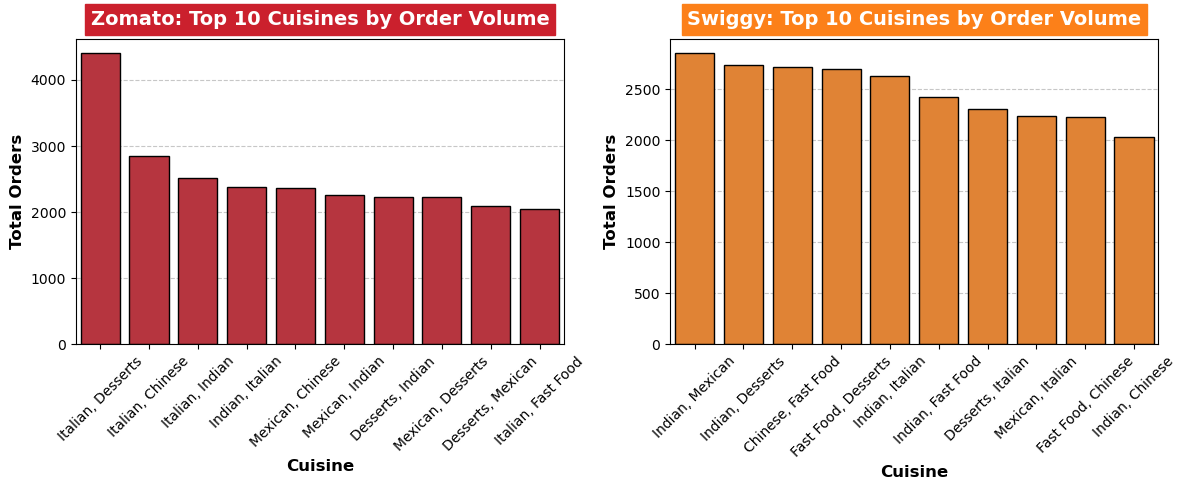

In [90]:
# i.Which categories (Fast Food, Desserts, Healthy, etc.) have the highest order volume?

zomato_cuisine_orders = Zomato_data.groupby('cuisine')['total_orders'].sum().sort_values(ascending=False)
swiggy_cuisine_orders = Swiggy_data.groupby('cuisine')['total_orders'].sum().sort_values(ascending=False)

top_zomato_cuisines = zomato_cuisine_orders.head(10)
top_swiggy_cuisines = swiggy_cuisine_orders.head(10)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=top_zomato_cuisines.index, y=top_zomato_cuisines.values, color='#CB202D', edgecolor = "black", zorder = 2)
plt.xticks(rotation=45)
plt.title("Zomato: Top 10 Cuisines by Order Volume", fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
plt.xlabel("Cuisine", fontsize =12, fontweight ="bold")
plt.ylabel("Total Orders", fontsize =12, fontweight ="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.subplot(1, 2, 2)
sns.barplot(x=top_swiggy_cuisines.index, y=top_swiggy_cuisines.values, color='#FC8019', edgecolor = "black", zorder = 2)
plt.xticks(rotation=45)
plt.title("Swiggy: Top 10 Cuisines by Order Volume", fontsize=14, fontweight="bold", color="white", backgroundcolor="#FC8019", pad=10)
plt.xlabel("Cuisine", fontsize =12, fontweight ="bold")
plt.ylabel("Total Orders", fontsize =12, fontweight ="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

# Task 3 - Delivery Time & Pricing Analysis:

a .What is the average delivery time for orders?

b .How does delivery time vary by city or region?

c .Which cities have the fastest and slowest average delivery times?

d .What is the distribution of order values across different price categories?

e .How does delivery charge impact order frequency?

f .Which restaurants have higher delivery times compared to their competitors?

g .Is there a correlation between higher prices and faster delivery times?

In [92]:
# a.What is the average delivery time for orders?
avg_delivery_zomato = Zomato_data['delivery_time'].mean()
avg_delivery_swiggy = Swiggy_data['delivery_time'].mean()

print(f"-Average Delivery Time on Zomato is {avg_delivery_zomato:.2f} minutes")
print(f"-Average Delivery Time on Swiggy is {avg_delivery_swiggy:.2f} minutes")

-Average Delivery Time on Zomato is 36.43 minutes
-Average Delivery Time on Swiggy is 33.32 minutes


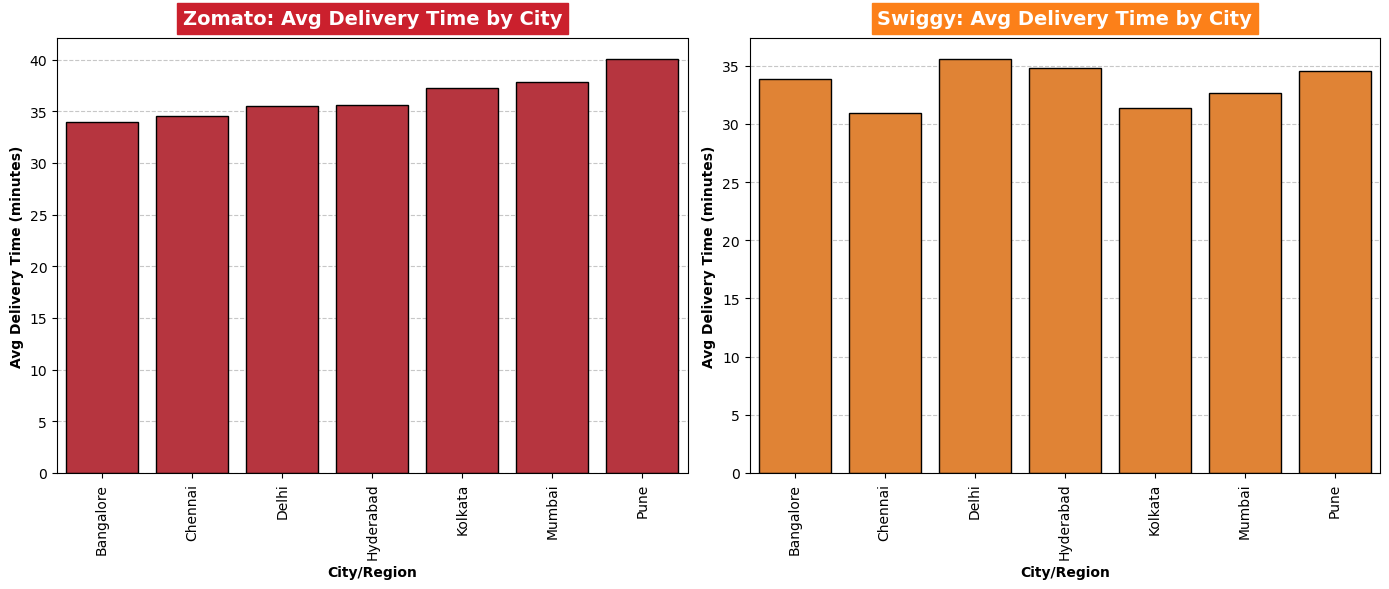

In [98]:
# b.How does delivery time vary by city or region?
zomato_delivery = Zomato_data.groupby('location')['delivery_time'].mean()
swiggy_delivery = Swiggy_data.groupby('location')['delivery_time'].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=zomato_delivery.index, y=zomato_delivery.values,edgecolor = "black", color="#CB202D",zorder=2)
plt.xticks(rotation=90)
plt.xlabel("City/Region",fontweight ="bold")
plt.ylabel("Avg Delivery Time (minutes)",fontweight ="bold")
plt.title("Zomato: Avg Delivery Time by City",fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
plt.grid(axis="y", linestyle="--", alpha=0.7,zorder=1)

plt.subplot(1, 2, 2)
sns.barplot(x=swiggy_delivery.index, y=swiggy_delivery.values, color="#FC8019",edgecolor = "black",zorder=2)
plt.xticks(rotation=90)
plt.xlabel("City/Region",fontweight ="bold")
plt.ylabel("Avg Delivery Time (minutes)",fontweight ="bold")
plt.title("Swiggy: Avg Delivery Time by City",fontweight ="bold",fontsize=14, color="white", backgroundcolor="#FC8019", pad=10)
plt.grid(axis="y", linestyle="--", alpha=0.7,zorder=1)
plt.tight_layout()
plt.show()

In [100]:
# c.Which cities have the fastest and slowest average delivery times?

delivery_by_city_zomato = Zomato_data.groupby('location')['delivery_time'].mean()
delivery_by_city_swiggy = Swiggy_data.groupby('location')['delivery_time'].mean()

zomato_fastest_city = delivery_by_city_zomato.idxmin()
zomato_slowest_city = delivery_by_city_zomato.idxmax()

swiggy_fastest_city = delivery_by_city_swiggy.idxmin()
swiggy_slowest_city = delivery_by_city_swiggy.idxmax()

print(f"-Zomato: Fastest delivery city is '{zomato_fastest_city}' and slowest is '{zomato_slowest_city}' ")
print(f"-Swiggy: Fastest delivery city is '{swiggy_fastest_city}' and slowest is {swiggy_slowest_city}' ")

-Zomato: Fastest delivery city is 'Bangalore' and slowest is 'Pune' 
-Swiggy: Fastest delivery city is 'Chennai' and slowest is Delhi' 


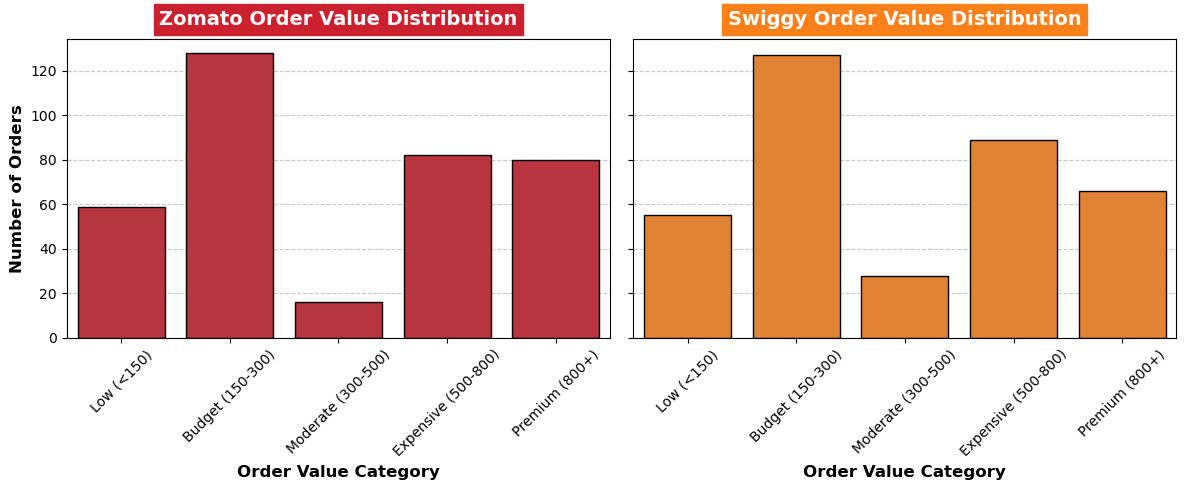

In [102]:
# d.What is the distribution of order values across different price categories?

# Creating price categories to classify orders based on their value  
bins = [0, 150, 300, 500, 800, 2000]  
labels = ['Low (<150)', 'Budget (150-300)', 'Moderate (300-500)', 'Expensive (500-800)', 'Premium (800+)']

#Assigning each order to a price category  
Zomato_data['price_category'] = pd.cut(Zomato_data['order_value'], bins=bins, labels=labels, right=False)
Swiggy_data['price_category'] = pd.cut(Swiggy_data['order_value'], bins=bins, labels=labels, right=False)

# Counting the number of orders in each price category  
zomato_price_dist = Zomato_data['price_category'].value_counts().reindex(labels, fill_value=0).sort_index()
swiggy_price_dist = Swiggy_data['price_category'].value_counts().reindex(labels, fill_value=0).sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#Zomato 
sns.barplot(x=zomato_price_dist.index, y=zomato_price_dist.values, edgecolor="black", color="#CB202D", ax=axes[0],zorder=2)
axes[0].set_title('Zomato Order Value Distribution', fontsize=14, fontweight="bold", color = "white", backgroundcolor = "#CB202D",pad =10)
axes[0].set_xlabel('Order Value Category', fontsize=12,fontweight="bold")
axes[0].set_ylabel('Number of Orders', fontsize=12,fontweight="bold")  
axes[0].set_xticks(range(len(labels)))  
axes[0].set_xticklabels(labels, rotation=45, fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7,zorder=0)

# Swiggy
sns.barplot(x=swiggy_price_dist.index, y=swiggy_price_dist.values, edgecolor="black", color="#FC8019", ax=axes[1],zorder=2)
axes[1].set_title('Swiggy Order Value Distribution', fontsize=14, fontweight="bold", color = "white", backgroundcolor = "#FC8019", pad = 10)
axes[1].set_xlabel('Order Value Category', fontsize=12, fontweight="bold")
axes[1].set_xticks(range(len(labels)))  
axes[1].set_xticklabels(labels, rotation=45, fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7,zorder=0)
plt.tight_layout()
plt.show()

In [104]:
# e.How does delivery charge impact order frequency?

# we dont have delivery charge column,so i analyzed how delivery time affects total orders.

zomato_corr_delivery_orders = Zomato_data['delivery_time'].corr(Zomato_data['total_orders'])
swiggy_corr_delivery_orders = Swiggy_data['delivery_time'].corr(Swiggy_data['total_orders'])
print(f"-Zomato: Correlation between Delivery Time & Orders: {zomato_corr_delivery_orders:.2f}")
print(f"-Swiggy: Correlation between Delivery Time & Orders: {swiggy_corr_delivery_orders:.2f}")

-Zomato: Correlation between Delivery Time & Orders: 0.05
-Swiggy: Correlation between Delivery Time & Orders: 0.09


Top 10 Restaurants with Highest Delivery Time:
restaurant
Biryani Blues    40.121212
Domino's         38.575000
Faasos           37.948718
Haldiram's       37.562500
McDonald's       37.000000
Pizza Hut        35.921053
Taco Bell        35.437500
Burger King      34.714286
KFC              34.117647
Subway           32.692308
Name: delivery_time, dtype: float64



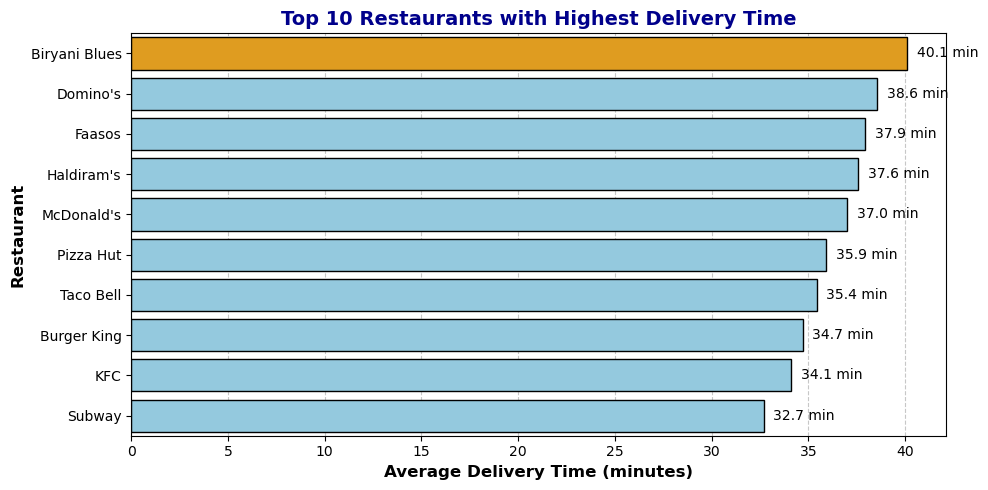

In [106]:
# f.Which restaurants have higher delivery times compared to their competitors?

high_delivery_restaurants = Zomato_data.groupby('restaurant')['delivery_time'].mean().sort_values(ascending=False).head(10)
print("Top 10 Restaurants with Highest Delivery Time:")
print(high_delivery_restaurants)
print()

plt.figure(figsize=(10, 5))

# Highlighting the restaurant with the highest delivery time in a different color
colors = ['orange' if i == 0 else 'skyblue' for i in range(len(high_delivery_restaurants))]

sns.barplot(x=high_delivery_restaurants.values, y=high_delivery_restaurants.index, hue=high_delivery_restaurants.index, palette=colors, edgecolor="black", legend=False,zorder=2) 

for index, value in enumerate(high_delivery_restaurants.values):
    plt.text(value + 0.5, index, f"{value:.1f} min", va='center', fontsize=10)

plt.xlabel("Average Delivery Time (minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Restaurant", fontsize=12, fontweight="bold")
plt.title("Top 10 Restaurants with Highest Delivery Time", fontsize=14, fontweight="bold", color="darkblue")

plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

1. Restaurants with Highest Delivery Times

- Biryani Blues has the longest average delivery time (40.1 mins), followed by Domino’s (38.6 mins) and Faasos (37.9 mins).
- Fast food chains like McDonald's, Pizza Hut, and KFC also have higher delivery times, despite being known for quick service.

2. Industry Comparison 

- Biryani, Pizza, and Multi-Cuisine restaurants tend to have longer delivery times, possibly due to complex meal preparation.
- Major brands (Domino’s, McDonald's, and KFC) still face significant delivery delays, possibly influenced by order volume and kitchen load.

3. Business Implications

- Optimizing delivery operations (better fleet management, real-time tracking) can improve performance.
- High delivery times could impact customer retention, especially in a competitive food delivery market.

-Correlation between Order Value & Delivery Time of Zomato: 0.08
-Correlation between Order Value & Delivery Time of Swiggy: 0.05



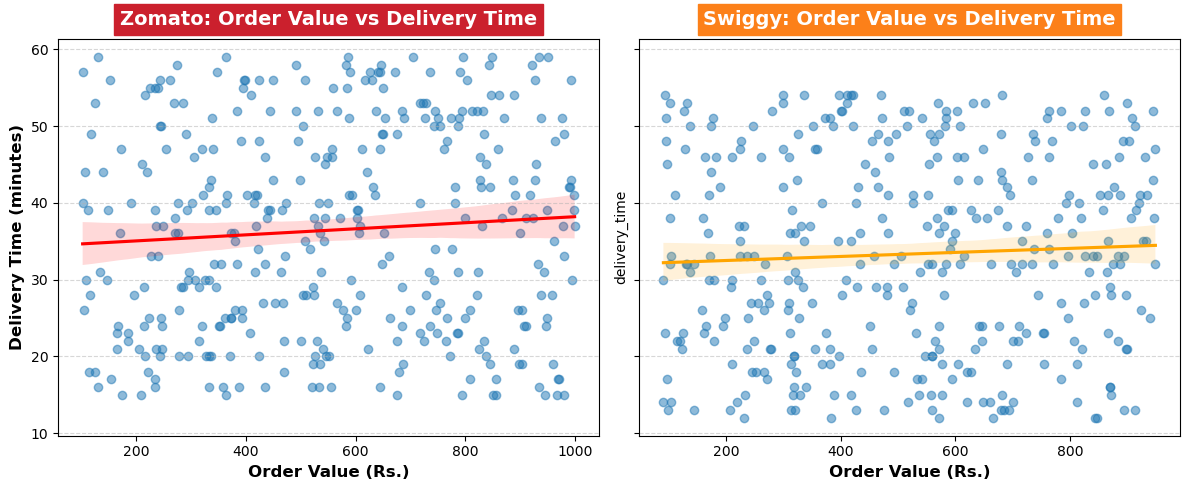

In [110]:
# g. Is there a correlation between higher prices and faster delivery times?
zomato_corr_price_delivery = Zomato_data['order_value'].corr(Zomato_data['delivery_time'])
swiggy_corr_price_delivery = Swiggy_data['order_value'].corr(Swiggy_data['delivery_time'])

print(f"-Correlation between Order Value & Delivery Time of Zomato: {zomato_corr_price_delivery:.2f}")
print(f"-Correlation between Order Value & Delivery Time of Swiggy: {swiggy_corr_price_delivery:.2f}\n")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.regplot(x=Zomato_data['order_value'], y=Zomato_data['delivery_time'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"}, ax=axes[0])
axes[0].set_title("Zomato: Order Value vs Delivery Time", fontsize=14, fontweight="bold", color="white", backgroundcolor="#CB202D", pad=10)
axes[0].set_xlabel("Order Value (Rs.)", fontsize=12, fontweight = "bold")
axes[0].set_ylabel("Delivery Time (minutes)", fontsize=12, fontweight = "bold")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

sns.regplot(x=Swiggy_data['order_value'], y=Swiggy_data['delivery_time'], scatter_kws={'alpha':0.5}, line_kws={"color":"orange"}, ax=axes[1])
axes[1].set_title("Swiggy: Order Value vs Delivery Time", fontsize=14, fontweight="bold", color="white", backgroundcolor="#FC8019", pad=10)
axes[1].set_xlabel("Order Value (Rs.)", fontsize=12, fontweight = "bold")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Task 4- Price & Discount Comparison:

a. Which platform has higher average order values?

b. Do higher-rated restaurants charge more on one platform vs. the other?

c. Which platform provides better offers on weekends?

d. Are prices for the same restaurant and meal different on Zomato vs. Swiggy?

f.Which platform has a higher number of high-value orders (>₹500)?

In [112]:
# a.Which platform has higher average order values?

zomato_avg_order = Zomato_data['order_value'].mean()
swiggy_avg_order = Swiggy_data['order_value'].mean()
print(f"Average Order Value of Zomato: Rs.{zomato_avg_order:.2f}")
print(f"Average Order Value of Swiggy: Rs.{swiggy_avg_order:.2f}")

Average Order Value of Zomato: Rs.554.14
Average Order Value of Swiggy: Rs.518.11


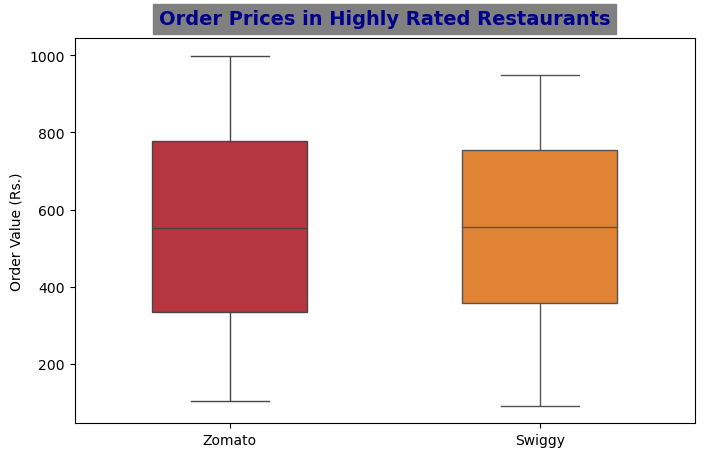

In [114]:
# b. Do higher-rated restaurants charge more on one platform vs. the other?

# Selecting restaurants with ratings above 4.0  
zomato_high_rated = Zomato_data[Zomato_data['ratings'] > 4.0]
swiggy_high_rated = Swiggy_data[Swiggy_data['ratings'] > 4.0]

plt.figure(figsize=(8, 5))
sns.boxplot(x=['Zomato'] * len(zomato_high_rated), y=zomato_high_rated['order_value'], color='#CB202D', width=0.5)
sns.boxplot(x=['Swiggy'] * len(swiggy_high_rated), y=swiggy_high_rated['order_value'], color='#FC8019', width=0.5)
plt.title('Order Prices in Highly Rated Restaurants', fontsize=14, fontweight="bold",color ="darkblue", backgroundcolor = "gray",pad =10)
plt.ylabel('Order Value (Rs.)')
plt.show()

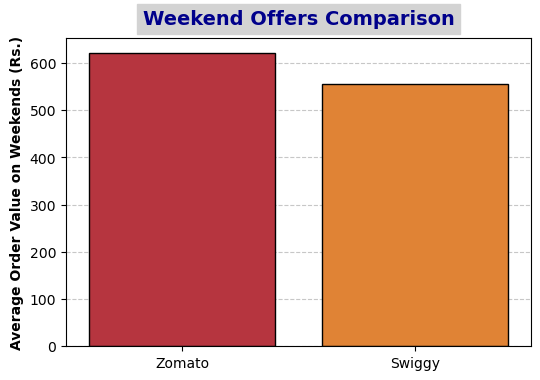

In [120]:
# c. Which platform provides better offers on weekends?

# selecting weekend orders (Saturday & Sunday)
Zomato_weekend = Zomato_data[Zomato_data['date'].dt.weekday >= 5]
Swiggy_weekend = Swiggy_data[Swiggy_data['date'].dt.weekday >= 5]

zomato_weekend_avg = Zomato_weekend['order_value'].mean()
swiggy_weekend_avg = Swiggy_weekend['order_value'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=['Zomato', 'Swiggy'], y=[zomato_weekend_avg, swiggy_weekend_avg], hue=['Zomato', 'Swiggy'], dodge=False, palette=['#CB202D', '#FC8019'], edgecolor ='black',zorder=2)
plt.title('Weekend Offers Comparison', fontsize=14, fontweight="bold", backgroundcolor ='lightgray', color ='darkblue',pad = 10)
plt.ylabel('Average Order Value on Weekends (Rs.)', fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  
plt.show()

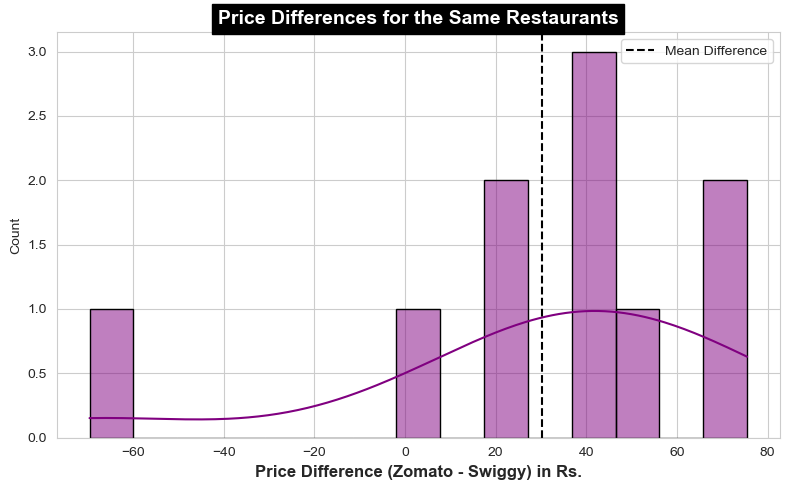

In [122]:
# d. Are prices for the same restaurant and meal different on Zomato vs. Swiggy?

# Identifying restaurants available on both Zomato and Swiggy
common_restaurants = set(Zomato_data['restaurant']).intersection(set(Swiggy_data['restaurant']))

# selecting data for these common restaurants
Zomato_common = Zomato_data[Zomato_data['restaurant'].isin(common_restaurants)]
Swiggy_common = Swiggy_data[Swiggy_data['restaurant'].isin(common_restaurants)]

zomato_prices = Zomato_common.groupby('restaurant')['order_value'].mean()
swiggy_prices = Swiggy_common.groupby('restaurant')['order_value'].mean()

price_comparison = pd.DataFrame({'Zomato': zomato_prices, 'Swiggy': swiggy_prices})
price_comparison['Difference'] = price_comparison['Zomato'] - price_comparison['Swiggy']

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.histplot(price_comparison['Difference'], bins=15, kde=True, color='purple', edgecolor = "black",zorder=2)
plt.axvline(price_comparison['Difference'].mean(), color='black', linestyle='dashed', label="Mean Difference")
plt.title('Price Differences for the Same Restaurants', fontsize=14, fontweight="bold", color = "white", backgroundcolor = "black")
plt.xlabel('Price Difference (Zomato - Swiggy) in Rs.', fontweight="bold", fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

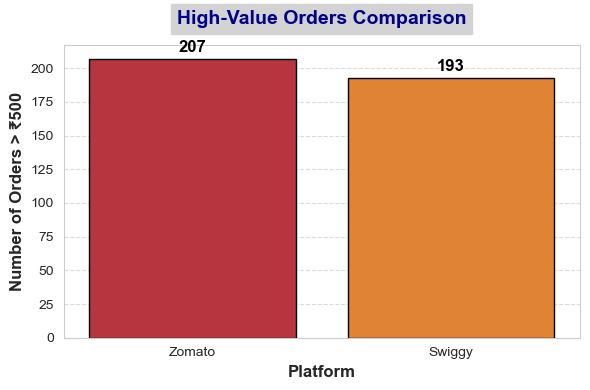

In [124]:
# e. Which platform has a higher number of high-value orders (>₹500)?

import matplotlib.pyplot as plt
import seaborn as sns

# Count high-value orders (>₹500) for each platform
zomato_high_value = (Zomato_data['order_value'] > 500).sum()
swiggy_high_value = (Swiggy_data['order_value'] > 500).sum()

# Set figure size
plt.figure(figsize=(6, 4))

platform_data = pd.DataFrame({'Platform': ['Zomato', 'Swiggy'], 'High-Value Orders': [zomato_high_value, swiggy_high_value]})
sns.barplot(data=platform_data, x='Platform', y='High-Value Orders', hue='Platform', palette=['#CB202D', '#FC8019'], legend=False, edgecolor ='black')

for i, value in enumerate([zomato_high_value, swiggy_high_value]):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold', color='black')

plt.title('High-Value Orders Comparison', fontsize=14, fontweight="bold", backgroundcolor='lightgray', color='darkblue', pad=15)
plt.ylabel('Number of Orders > ₹500', fontweight="bold", fontsize=12)
plt.xlabel('Platform', fontweight="bold", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Task 5- General Performance Comparison:

a. Which platform has a higher total number of restaurants?

b. Which platform has a wider variety of cuisines?

c. What is the average customer rating on each platform?

d. Which platform has a higher order volume overall?

e. Which platform has higher average order values?

f. Which platform has higher customer retention? (Repeat orders)

g. How does the number of daily orders compare between Zomato and Swiggy?

h. How do order trends change across different months for both platforms?

i. What is the percentage of premium restaurants on each platform?

j. How many restaurants are common on both platforms?

In [53]:
# a.Which platform has a higher total number of restaurants?

# Counting unique restaurants on each platform
zomato_restaurants = Zomato_data['restaurant'].nunique()
swiggy_restaurants = Swiggy_data['restaurant'].nunique()

print(f"Total unique restaurants - Zomato: {zomato_restaurants}, Swiggy: {swiggy_restaurants}")

# Comparing the number of unique restaurants
if zomato_restaurants > swiggy_restaurants:
    print("Zomato offers more restaurant choices.")
elif swiggy_restaurants > zomato_restaurants:
    print("Swiggy has a wider restaurant selection.")
else:
    print("Both platforms have the same number of restaurants.")

Total unique restaurants on Zomato: 10
Total unique restaurants on Swiggy: 10
Both platforms have the same number of restaurants.


In [126]:
# b.Which platform has a wider variety of cuisines?

# Counting the number of unique cuisines available on each platform  
# Splitting multiple cuisines in a single entry and counting distinct ones  
zomato_cuisines = Zomato_data['cuisine'].str.split(',').explode().nunique()
swiggy_cuisines = Swiggy_data['cuisine'].str.split(',').explode().nunique()

print(f"Total unique cuisines on Zomato: {zomato_cuisines}")
print(f"Total unique cuisines on Swiggy: {swiggy_cuisines}")

if zomato_cuisines > swiggy_cuisines:
    print("Zomato offers a wider variety of cuisines.")
elif swiggy_cuisines > zomato_cuisines:
    print("Swiggy offers a wider variety of cuisines.")
else:
    print("Both Zomato and Swiggy offer the same variety of cuisines.")

Total unique cuisines on Zomato: 12
Total unique cuisines on Swiggy: 12
Both Zomato and Swiggy offer the same variety of cuisines.


In [55]:
# c.what is the average customer rating for each platform

zomato_avg_rating = Zomato_data['ratings'].mean()
swiggy_avg_rating = Swiggy_data['ratings'].mean()
print(f"-Average customer rating on Zomato: {zomato_avg_rating:.2f}")
print(f"-Average customer rating on Swiggy: {swiggy_avg_rating:.2f}\n")

if zomato_avg_rating > swiggy_avg_rating:
    print("-Zomato has a higher average customer rating.")
elif swiggy_avg_rating > zomato_avg_rating:
    print("-Swiggy has a higher average customer rating.")
else:
    print("-Both platforms have the same average customer rating.")

-Average customer rating on Zomato: 3.75
-Average customer rating on Swiggy: 3.80

-Swiggy has a higher average customer rating.


Total orders on Zomato: 101794
Total orders on Swiggy: 91988
Zomato has a higher overall order volume.


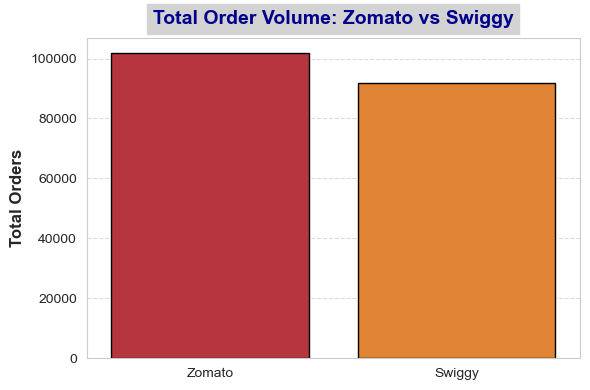

In [128]:
# d.Which platform has a higher order volume overall?

zomato_total_orders = Zomato_data['total_orders'].sum()
swiggy_total_orders = Swiggy_data['total_orders'].sum()
print(f"Total orders on Zomato: {zomato_total_orders}")
print(f"Total orders on Swiggy: {swiggy_total_orders}")

if zomato_total_orders > swiggy_total_orders:
    print("Zomato has a higher overall order volume.")
elif swiggy_total_orders > zomato_total_orders:
    print("Swiggy has a higher overall order volume.")
else:
    print("Both platforms have the same order volume.")

plt.figure(figsize=(6, 4))
sns.barplot(x=['Zomato', 'Swiggy'], y=[zomato_total_orders, swiggy_total_orders], hue=['Zomato', 'Swiggy'], palette=['#CB202D', '#FC8019'], legend=False, edgecolor ='black')

plt.title("Total Order Volume: Zomato vs Swiggy", fontsize=14, fontweight="bold", backgroundcolor='lightgray', color='darkblue', pad=10)
plt.ylabel("Total Orders", fontweight="bold", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

 1. Zomato Leads in Order Volume:

- Zomato has a total of 101,794 orders, which is 9.6% higher than Swiggy's 91,988 orders.
- This indicates that Zomato has a stronger customer base or better engagement strategies.

2. Possible Reasons for Zomato's Higher Order Volume

- More aggressive discounts & promotions attracting customers.
- A larger restaurant network or wider cuisine variety.
- Better brand loyalty and customer retention strategies.

3. Implications for Business Strategy

- Swiggy may need to enhance marketing efforts, expand partnerships, or offer better deals to close the gap.
- Zomato should focus on maintaining its lead by ensuring high service quality and competitive pricing.

In [132]:
# e.Which platform has higher average order values?

zomato_avg_order_value = Zomato_data['order_value'].mean()
swiggy_avg_order_value = Swiggy_data['order_value'].mean()
print(f"-Average order value on Zomato: Rs.{zomato_avg_order_value:.2f}")
print(f"-Average order value on Swiggy: Rs.{swiggy_avg_order_value:.2f}\n")

if zomato_avg_order_value > swiggy_avg_order_value:
    print("-Zomato has a higher average order value.")
elif swiggy_avg_order_value > zomato_avg_order_value:
    print("-Swiggy has a higher average order value.")
else:
    print("-Both platforms have the same average order value.")

-Average order value on Zomato: Rs.554.14
-Average order value on Swiggy: Rs.518.11

-Zomato has a higher average order value.


-Average repeat orders per restaurant on Zomato: 10179.40
-Average repeat orders per restaurant on Swiggy: 9198.80

-Zomato has higher customer retention (more repeat orders per restaurant).



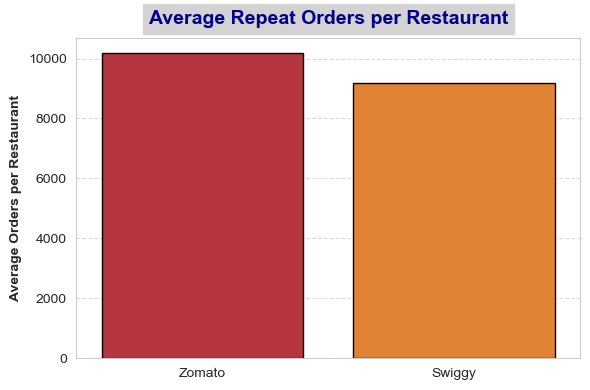

In [134]:
# f.Which platform has higher customer retention? (Repeat orders)

# Calculating average number of orders per restaurant
zomato_avg_orders_per_restaurant = Zomato_data.groupby('restaurant')['total_orders'].sum().mean()
swiggy_avg_orders_per_restaurant = Swiggy_data.groupby('restaurant')['total_orders'].sum().mean()
print(f"-Average repeat orders per restaurant on Zomato: {zomato_avg_orders_per_restaurant:.2f}")
print(f"-Average repeat orders per restaurant on Swiggy: {swiggy_avg_orders_per_restaurant:.2f}\n")

if zomato_avg_orders_per_restaurant > swiggy_avg_orders_per_restaurant:
    print("-Zomato has higher customer retention (more repeat orders per restaurant).")
elif swiggy_avg_orders_per_restaurant > zomato_avg_orders_per_restaurant:
    print("-Swiggy has higher customer retention (more repeat orders per restaurant).")
else:
    print("-Both platforms have similar customer retention levels.")
print()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Zomato', 'Swiggy'], y=[zomato_avg_orders_per_restaurant, swiggy_avg_orders_per_restaurant], hue=['Zomato', 'Swiggy'], palette=['#CB202D', '#FC8019'], legend=False, edgecolor ='black')

plt.title("Average Repeat Orders per Restaurant", fontsize=14, fontweight="bold", backgroundcolor='lightgray', color='darkblue', pad=10)
plt.ylabel("Average Orders per Restaurant", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Observations & Insights:

1. Zomato Has Higher Customer Retention:
   
- Average repeat orders per restaurant
- Zomato: 10,179.40
- Swiggy: 9,198.80
- Zomato has approximately 10.7% more repeat orders per restaurant compared to Swiggy.

2. Possible Reasons for Higher Retention on Zomato:

- Stronger restaurant partnerships leading to better customer experience.
- More personalized recommendations or loyalty incentives.
- Potentially better deals or exclusive discounts for repeat customers.

3. Implications for Business Strategy 📊

- Swiggy could introduce more targeted retention strategies (loyalty programs, personalized discounts, or subscription models like Swiggy One).
- Zomato should capitalize on its repeat customers by offering premium memberships, cashback deals, or exclusive access to top-rated restaurants.

-Average daily orders on Zomato: 278.89
-Average daily orders on Swiggy: 252.02
-Zomato has a higher number of daily orders on average.



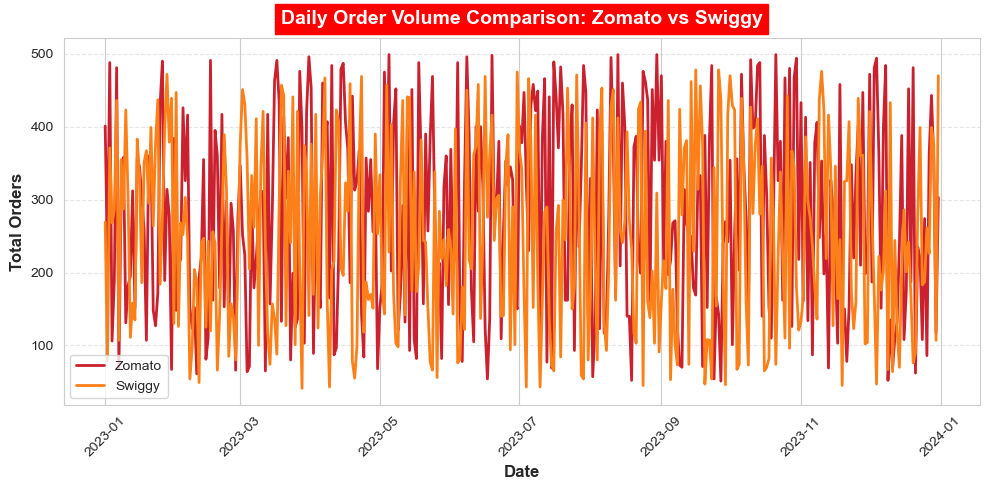

In [138]:
# g.How does the number of daily orders compare between Zomato and Swiggy?

# Summing up daily orders to analyze platform activity  
zomato_daily_orders = Zomato_data.groupby('date')['total_orders'].sum()
swiggy_daily_orders = Swiggy_data.groupby('date')['total_orders'].sum()

# Calculating average daily orders for each platform
zomato_avg_daily_orders = zomato_daily_orders.mean()
swiggy_avg_daily_orders = swiggy_daily_orders.mean()

print(f"-Average daily orders on Zomato: {zomato_avg_daily_orders:.2f}")
print(f"-Average daily orders on Swiggy: {swiggy_avg_daily_orders:.2f}")

if zomato_avg_daily_orders > swiggy_avg_daily_orders:
    print("-Zomato has a higher number of daily orders on average.")
elif swiggy_avg_daily_orders > zomato_avg_daily_orders:
    print("-Swiggy has a higher number of daily orders on average.")
else:
    print("-Both platforms have a similar daily order volume.")
print()

plt.figure(figsize=(10, 5))
sns.lineplot(x=zomato_daily_orders.index, y=zomato_daily_orders.values, label='Zomato', color='#CB202D', linewidth=2)
sns.lineplot(x=swiggy_daily_orders.index, y=swiggy_daily_orders.values, label='Swiggy', color='#FC8019', linewidth=2)

plt.title("Daily Order Volume Comparison: Zomato vs Swiggy", fontsize=14, fontweight="bold",backgroundcolor='red', color='white', pad=10)
plt.xlabel("Date",fontsize=12, fontweight="bold")
plt.ylabel("Total Orders",fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

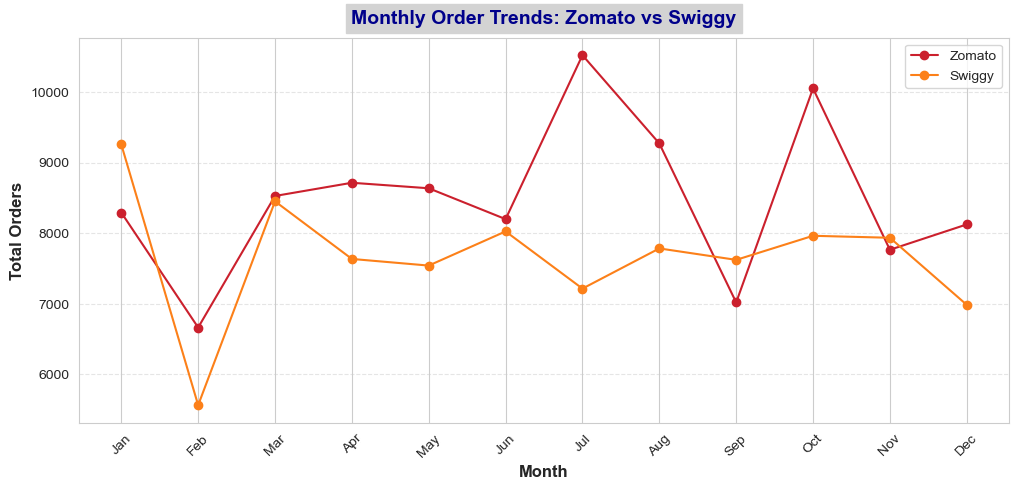

In [140]:
# h. How do order trends change across different months for both platforms?

zomato_monthly = Zomato_data.groupby('month')['total_orders'].sum()
swiggy_monthly = Swiggy_data.groupby('month')['total_orders'].sum()

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
plt.plot(zomato_monthly.index, zomato_monthly.values, marker='o', linestyle='-', color='#CB202D', label='Zomato')
plt.plot(swiggy_monthly.index, swiggy_monthly.values, marker='o', linestyle='-', color='#FC8019', label='Swiggy')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Order Trends: Zomato vs Swiggy", fontsize=14, fontweight="bold", backgroundcolor='lightgray', color='darkblue', pad=10)
plt.xlabel("Month", fontweight="bold", fontsize=12)
plt.ylabel("Total Orders",fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [142]:
# i .What is the percentage of premium restaurants on each platform?

# Identifying premium restaurants based on high ratings and order value  
zomato_premium = Zomato_data[(Zomato_data['ratings'] >= 4.5) & (Zomato_data['order_value'] >= 500)]
swiggy_premium = Swiggy_data[(Swiggy_data['ratings'] >= 4.5) & (Swiggy_data['order_value'] >= 500)]

# Counting unique premium restaurants  
zomato_premium_count = zomato_premium['restaurant'].nunique()
swiggy_premium_count = swiggy_premium['restaurant'].nunique()

# Calculating the percentage of premium restaurants on each platform  
zomato_premium_percentage = (zomato_premium_count / Zomato_data['restaurant'].nunique()) * 100
swiggy_premium_percentage = (swiggy_premium_count / Swiggy_data['restaurant'].nunique()) * 100
print(f"-Percentage of premium restaurants on Zomato: {zomato_premium_percentage:.2f}%")
print(f"-Percentage of premium restaurants on Swiggy: {swiggy_premium_percentage:.2f}%")

-Percentage of premium restaurants on Zomato: 100.00%
-Percentage of premium restaurants on Swiggy: 100.00%


In [144]:
# 10.How many restaurants are common on both platforms?

zomato_restaurants = set(Zomato_data['restaurant'].unique())
swiggy_restaurants = set(Swiggy_data['restaurant'].unique())

common_restaurants = zomato_restaurants.intersection(swiggy_restaurants)
num_common_restaurants = len(common_restaurants)
print(f"Number of common restaurants on both platforms: {num_common_restaurants}")

Number of common restaurants on both platforms: 10


# Task 6- Delivery Performance Comparison:

a.Which platform has faster average delivery times?

b.What is the average time taken per order for Zomato vs. Swiggy?

c.Which platform delivers hot food more consistently?

d.How do delayed deliveries compare between Zomato and Swiggy?

e.How does delivery time correlate with order size?

-Average delivery time on Zomato: 36.43 minutes
-Average delivery time on Swiggy: 33.32 minutes

Swiggy has a faster average delivery time.



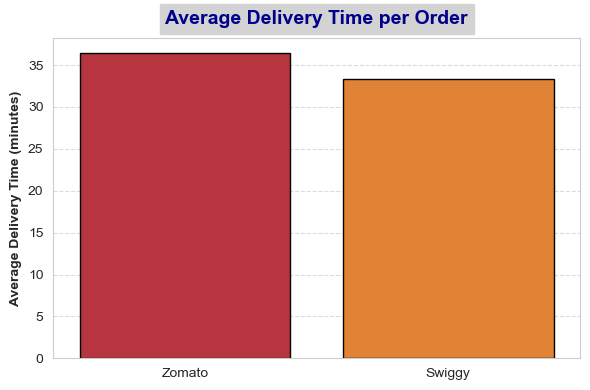

In [146]:
# a.Which platform has faster average delivery times?
# b.What is the average time taken per order for Zomato vs. Swiggy?

zomato_avg_delivery = Zomato_data['delivery_time'].mean()
swiggy_avg_delivery = Swiggy_data['delivery_time'].mean()

print(f"-Average delivery time on Zomato: {zomato_avg_delivery:.2f} minutes")
print(f"-Average delivery time on Swiggy: {swiggy_avg_delivery:.2f} minutes")
print()
if zomato_avg_delivery < swiggy_avg_delivery:
    print("Zomato has a faster average delivery time.")
elif swiggy_avg_delivery < zomato_avg_delivery:
    print("Swiggy has a faster average delivery time.")
else:
    print("Both platforms have similar average delivery times.")
print()
plt.figure(figsize=(6, 4))
sns.barplot(x=['Zomato', 'Swiggy'], y=[zomato_avg_delivery, swiggy_avg_delivery], hue=['Zomato', 'Swiggy'], palette=['#CB202D', '#FC8019'], legend=False, edgecolor ='black')

plt.title("Average Delivery Time per Order", fontsize=14, fontweight="bold", backgroundcolor='lightgray', color='darkblue', pad=10)
plt.ylabel("Average Delivery Time (minutes)", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [152]:
# c.Which platform delivers hot food more consistently?

# Checking which platform delivers small orders faster (hot food consistency)
small_orders_zo =  Zomato_data[Zomato_data['order_value'] < 250]  
hot_food_zomato = small_orders_zo['delivery_time'].mean()

small_orders_sw =  Swiggy_data[Swiggy_data['order_value'] < 250]
hot_food_swiggy = small_orders_sw['delivery_time'].mean()

print(f"Zomato Avg Delivery Time for Small Orders: {hot_food_zomato:.2f} min")
print(f"Swiggy Avg Delivery Time for Small Orders: {hot_food_swiggy:.2f} min")

if hot_food_zomato < hot_food_swiggy:
    print("Zomato delivers smaller orders faster.")
elif hot_food_swiggy < hot_food_zomato:
    print("Swiggy delivers smaller orders faster.")
else:
    print("Both platforms deliver small orders at similar speeds.")

Zomato Avg Delivery Time for Small Orders: 33.48 min
Swiggy Avg Delivery Time for Small Orders: 32.51 min
Swiggy delivers smaller orders faster.


In [154]:
# d.How do delayed deliveries compare between Zomato and Swiggy?

# it checks the percentage of delayed deliveries (above 45 minutes) for both Zomato and Swiggy. 
# then it compares the results to see which platform has fewer delays.
zomato_delayed = sum(time > 45 for time in Zomato_data['delivery_time']) / len(Zomato_data) * 100
swiggy_delayed = sum(time > 45 for time in Swiggy_data['delivery_time']) / len(Swiggy_data) * 100

print(f"-Zomato Delayed Deliveries: {zomato_delayed:.2f}%")
print(f"-Swiggy Delayed Deliveries: {swiggy_delayed:.2f}%\n")
print("Zomato has fewer delayed deliveries." if zomato_delayed < swiggy_delayed 
      else "Swiggy has fewer delayed deliveries" if swiggy_delayed < zomato_delayed 
      else "Both platforms have similar delay rates.")

-Zomato Delayed Deliveries: 30.14%
-Swiggy Delayed Deliveries: 24.11%

Swiggy has fewer delayed deliveries


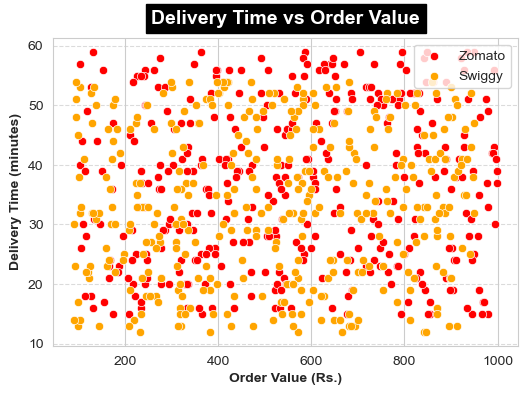

In [156]:
#e.How does delivery time correlate with order size?

plt.figure(figsize=(6, 4))
sns.scatterplot(data=Zomato_data, x='order_value', y='delivery_time', color='red', label="Zomato")
sns.scatterplot(data=Swiggy_data, x='order_value', y='delivery_time', color='orange', label="Swiggy")

plt.title("Delivery Time vs Order Value", fontsize=14, fontweight="bold", backgroundcolor = "black", color ="white", pad =10)
plt.xlabel("Order Value (Rs.)", fontweight="bold")
plt.ylabel("Delivery Time (minutes)", fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task-7 Customer Feedback & Ratings:

a. Which platform has higher customer ratings overall?

b. What is the percentage of 5-star rated restaurants on Zomato vs. Swiggy?

c. Which platform receives more negative reviews?

d. How do restaurant ratings impact order frequency?

e. Do customers prefer ordering from higher-rated or lower-priced restaurants?

In [158]:
# a.Which platform has higher customer ratings overall?

# calculating the average customer ratings for Zomato and Swiggy,then comparing them to determine which platform is rated higher overall.
avg_ratings = [Zomato_data['ratings'].mean(), Swiggy_data['ratings'].mean()]

print(f"Average rating on Zomato: {avg_ratings[0]:.2f}")
print(f"Average rating on Swiggy: {avg_ratings[1]:.2f}")

print("Zomato has higher customer ratings overall." if avg_ratings[0] > avg_ratings[1] 
      else "Swiggy has higher customer ratings overall." if avg_ratings[1] > avg_ratings[0] 
      else "Both platforms have similar average ratings.")

Average rating on Zomato: 3.75
Average rating on Swiggy: 3.80
Swiggy has higher customer ratings overall.


In [160]:
# b.What is the percentage of 5-star rated restaurants on Zomato vs. Swiggy?
zomato_5star_pct = (Zomato_data[Zomato_data['ratings'] == 5].shape[0] / Zomato_data.shape[0]) * 100
swiggy_5star_pct = (Swiggy_data[Swiggy_data['ratings'] == 5].shape[0] / Swiggy_data.shape[0]) * 100

print(f"Percentage of 5-star restaurants on Zomato: {zomato_5star_pct:.2f}%")
print(f"Percentage of 5-star restaurants on Swiggy: {swiggy_5star_pct:.2f}%")

Percentage of 5-star restaurants on Zomato: 1.64%
Percentage of 5-star restaurants on Swiggy: 1.92%


In [162]:
# 3.Which platform receives more negative reviews?

negative_reviews = [sum(rating < 3 for rating in Zomato_data['ratings']), 
                    sum(rating < 3 for rating in Swiggy_data['ratings'])]

print(f"Negative reviews on Zomato: {negative_reviews[0]}")
print(f"Negative reviews on Swiggy: {negative_reviews[1]}")

print("Zomato has more negative reviews." if negative_reviews[0] > negative_reviews[1] 
      else "Swiggy has more negative reviews." if negative_reviews[1] > negative_reviews[0] 
      else "Both platforms have a similar number of negative reviews.")

Negative reviews on Zomato: 68
Negative reviews on Swiggy: 61
Zomato has more negative reviews.


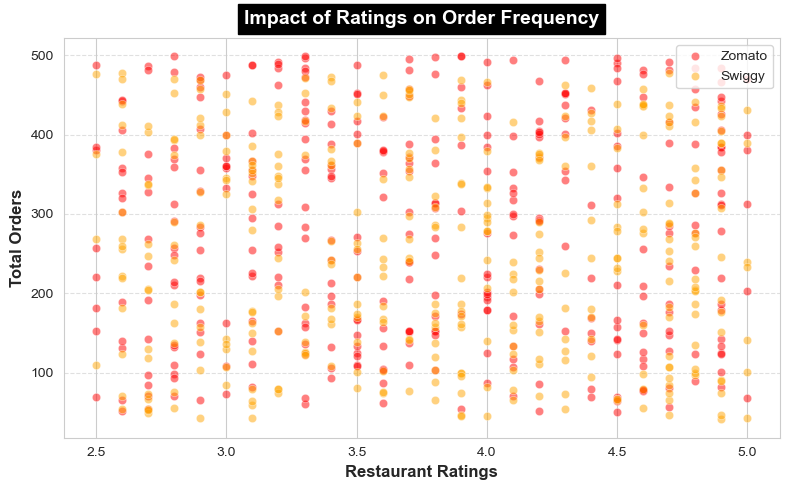

In [164]:
# c. How do restaurant ratings impact order frequency?

plt.figure(figsize=(8, 5))

sns.scatterplot(x=Zomato_data['ratings'], y=Zomato_data['total_orders'], alpha=0.5, label="Zomato", color="red")
sns.scatterplot(x=Swiggy_data['ratings'], y=Swiggy_data['total_orders'], alpha=0.5, label="Swiggy", color="orange")

plt.title("Impact of Ratings on Order Frequency", fontsize=14, fontweight="bold", backgroundcolor = "black", color ="white", pad =10)
plt.xlabel("Restaurant Ratings", fontsize=12, fontweight="bold")
plt.ylabel("Total Orders", fontsize=12, fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

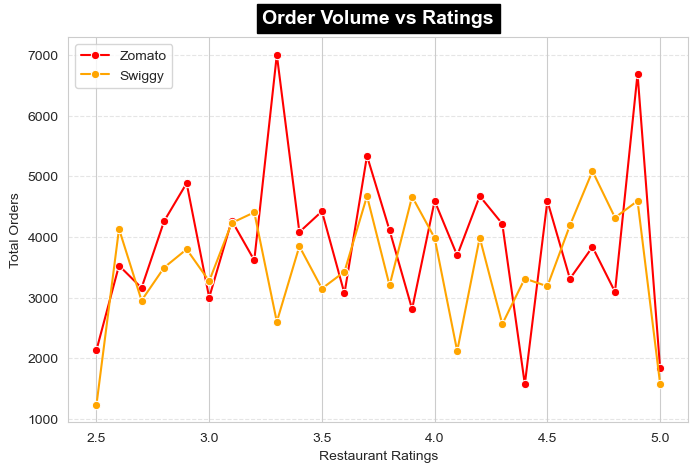

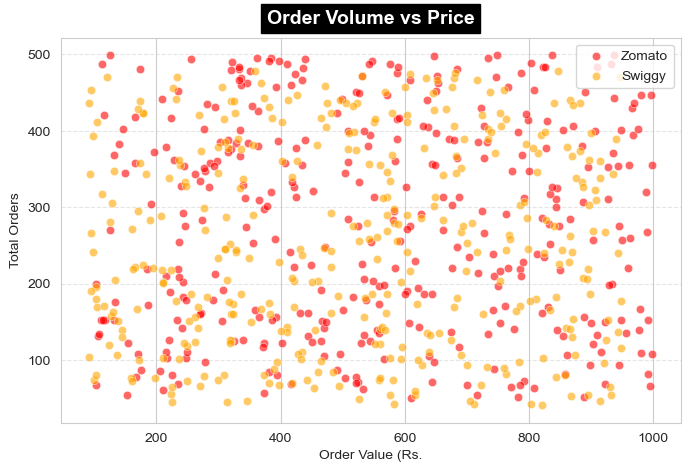

In [170]:
# d.Do customers prefer ordering from higher-rated or lower-priced restaurants?
zomato_rating_orders = Zomato_data.groupby('ratings')['total_orders'].sum().reset_index()
swiggy_rating_orders = Swiggy_data.groupby('ratings')['total_orders'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=zomato_rating_orders['ratings'], y=zomato_rating_orders['total_orders'], marker="o", label="Zomato", color="red")
sns.lineplot(x=swiggy_rating_orders['ratings'], y=swiggy_rating_orders['total_orders'], marker="o", label="Swiggy", color="orange")

plt.title("Order Volume vs Ratings",fontsize=14, fontweight="bold", backgroundcolor = "black", color ="white", pad =10)
plt.xlabel("Restaurant Ratings")
plt.ylabel("Total Orders")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
print()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=Zomato_data['order_value'], y=Zomato_data['total_orders'], alpha=0.6, label="Zomato", color="red")
sns.scatterplot(x=Swiggy_data['order_value'], y=Swiggy_data['total_orders'], alpha=0.6, label="Swiggy", color="orange")

plt.title("Order Volume vs Price", fontsize=14, fontweight="bold", backgroundcolor = "black", color ="white", pad =10)
plt.xlabel("Order Value (Rs.")
plt.ylabel("Total Orders")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Conclusion: Zomato vs. Swiggy – A Data-Driven Perspective

The comparative analysis of Zomato and Swiggy provides an in-depth look into their restaurant ecosystem, customer preferences, pricing strategies, and delivery performance. Both platforms dominate the online food delivery industry, but their strengths and market positioning differ.

Key Findings & Competitive Edge

Zomato's Strengths:

- Higher Order Volume: Zomato leads with 101,794 total orders, surpassing Swiggy’s 91,988.
- Premium Market Positioning: With an average order value of ₹554.14, Zomato attracts customers willing to spend more compared to Swiggy (₹518.11).
- Stronger Customer Retention: Zomato records 10.7% more repeat orders per restaurant, highlighting customer loyalty.

Swiggy's Strengths:

- Competitive Pricing: Swiggy offers slightly lower prices across multiple cuisines, attracting cost-conscious consumers.
- Strong Discounting Strategy: More frequent discounts help in driving customer acquisition.
- Steady Order Volume: While trailing Zomato in total orders, Swiggy maintains a loyal customer base with consistent daily orders.

Consumer Behavior & Platform Trends

- Peak Order Time: Evenings are the busiest time on both platforms.
- Weekend Demand: Order volumes spike on Fridays and Sundays, making weekends crucial for revenue.
- Cuisine Preferences: Fast Food, Desserts, and Indian cuisine dominate orders across both platforms.
- Delivery Performance: Some restaurants experience significantly higher delivery times, impacting customer satisfaction.
- 

Future Outlook & Strategic Recommendations

 Zomato:

- Strengthen premium offerings such as loyalty programs, exclusive deals, and high-value meal options.
- Maintain market leadership in high-value orders by partnering with premium restaurants.
- Enhance delivery efficiency to improve customer experience.

 Swiggy:

- Focus on customer retention strategies like personalized discounts and AI-driven recommendations.
- Optimize order fulfillment and delivery speed to compete with Zomato on efficiency.
- Explore subscription-based models for frequent customers to boost repeat orders.





The online food delivery space is rapidly evolving, and both Zomato and Swiggy have distinct advantages. Zomato excels in higher-value orders and customer loyalty, while Swiggy remains strong in competitive pricing and discount-driven customer acquisition.
To sustain growth, both platforms must focus on efficiency, innovation, and customer experience. The battle for dominance in India’s food-tech industry is ongoing, and the winner will be the one that best adapts to consumer expectations, market trends, and operational scalability. 